## CAPSTONE PROJECT - CLUSTERING: CUSTOMER SEGMENTATION 2

#### IMPORT PACKAGES

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#### READ DATASET

In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
path = "/content/gdrive/MyDrive/Narasio/Superstore.xlsx"
df = pd.read_excel(path)
df

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419136.00
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219582.00
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68714.00
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00,5,0.45,-383031.00
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00,2,0.20,25164.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248.00,3,0.20,41028.00
9990,9991,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,156332.00
9991,9992,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258576.00,2,0.20,193932.00
9992,9993,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32


#### PROBLEM STATEMENT

Pada case sebelumnya, Superstore ingin melakukan revenue optimization. Selain itu, Superstore juga ingin memberikan promo kepada pelanggannya sehingga harus dilakukan suatu analisis dari data. Analisis RFM digunakan untuk mengelompokkan pelanggan menjadi 3 kelompok, yaitu pelanggan silver, pelanggan gold, dan pelanggan platinum.




*   **Pelanggan platinum** adalah kelompok pelanggan yang sering
berbelanja dan mengeluarkan uang yang besar untuk berbelanja.
*   **Pelanggan silver** adalah kelompok pelanggan yang jarang berbelanja
dan mengeluarkan sedikit uang untuk berbelanja
*   **Pelanggan gold** adalah kelompok pelanggan di antara pelanggan
silver dan platinum.


Ketiga pengelompokan pelanggan di atas berhubungan dengan pemberian promo, mana pelanggan yang akan diberi promo besar, sedang, atau kecil.

#### EDA

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

📊 Semua variabel terlihat sudah memiliki format data yang benar, kecuali variabel tanggal. Harus dilakukan perbaikan format data.

Analisis Selisih Tanggal Pesan dan Tanggal Kirim

In [99]:
df['Tanggal_pesan'] = pd.to_datetime(df['Tanggal_pesan'], format='mixed')
df['Tanggal_kirim'] = pd.to_datetime(df['Tanggal_kirim'], format='mixed')

In [100]:
df['Lama_pengemasan'] = df['Tanggal_kirim'] - df['Tanggal_pesan']

📊 Dibentuk variabel baru bernama Lama_pengemasan yang menunjukkan selisih hari dari hari pemesanan hingga hari barang dikirim.

In [101]:
df['Lama_pengemasan'] = df['Lama_pengemasan'].apply(lambda x: x.days)
df

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Lama_pengemasan
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419136.00,92
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219582.00,92
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68714.00,-173
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00,5,0.45,-383031.00,-23
4,5,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00,2,0.20,25164.00,-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248.00,3,0.20,41028.00,2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,156332.00,5
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258576.00,2,0.20,193932.00,5
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32,5


In [102]:
df.describe()

,Index,Tanggal_pesan,Tanggal_kirim,Kode_pos,Penjualan,Kuantitas,Discount,Untung,Lama_pengemasan
count,9994.000000,9994,9994,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03,9994.000000
mean,4997.500000,2016-04-11 07:17:44.078447104,2016-04-20 15:38:17.458475008,55190.379428,1.009426e+05,3.789574,0.156203,1.798079e+05,9.347609
min,1.000000,2014-01-02 00:00:00,2014-01-04 00:00:00,1040.000000,4.440000e-01,1.000000,0.000000,-3.839990e+07,-322.000000
25%,2499.250000,2015-05-01 00:00:00,2015-05-07 00:00:00,23223.000000,3.978000e+01,2.000000,0.000000,1.899000e+01,2.000000
50%,4997.500000,2016-05-30 00:00:00,2016-06-12 00:00:00,56430.500000,3.493950e+02,3.000000,0.200000,3.628800e+04,4.000000
75%,7495.750000,2017-04-09 00:00:00,2017-04-29 00:00:00,90008.000000,2.524800e+04,5.000000,0.200000,1.509840e+05,61.000000
max,9994.000000,2017-12-30 00:00:00,2018-05-01 00:00:00,99301.000000,2.396266e+07,14.000000,0.800000,6.719981e+07,214.000000
std,2885.163629,NaN,NaN,32063.693350,5.183005e+05,2.225110,0.206452,1.722986e+06,95.408385


📊 Format tanggal terlihat aneh dengan terdapat tanggal pengiriman yang lebih dulu dibandingkan dengan tanggal pesan sehingga variabel Lama_pengemasan bernilai negatif.

In [103]:
#Membuat semua nilai positif
df['Lama_pengemasan'] = df['Lama_pengemasan'].abs()

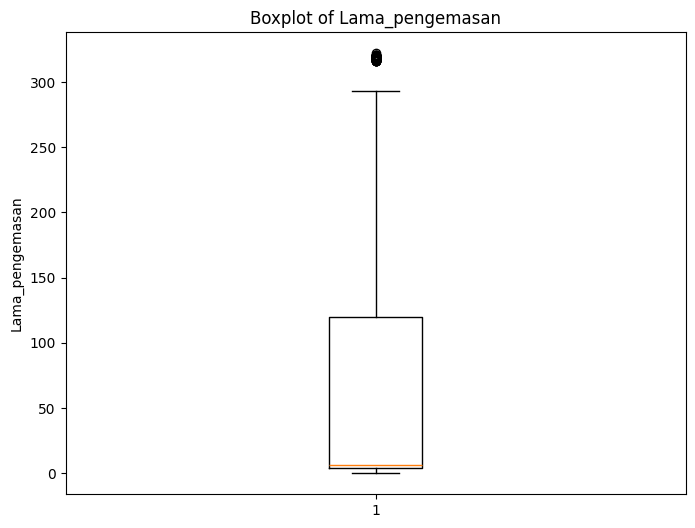

In [104]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Lama_pengemasan'])
plt.title('Boxplot of Lama_pengemasan')
plt.ylabel('Lama_pengemasan')
plt.show()

Analisis 2 Pelanggan yang Memiliki Jumlah Hari Lama_pengemasan yang Tinggi

In [105]:
pelanggan1 = df[df['ID_pelanggan'] == "CL-12565"].index
df.iloc[pelanggan1]

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Lama_pengemasan
111,112,CA-2016-128867,2016-03-11,2016-10-11,Standard Class,CL-12565,Clay Ludtke,Consumer,Urbandale,Iowa,...,Central,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.96,2,0.0,22788.00,214
112,113,CA-2016-128867,2016-03-11,2016-10-11,Standard Class,CL-12565,Clay Ludtke,Consumer,Urbandale,Iowa,...,Central,OFF-BI-10003981,Office Supplies,Binders,"Avery Durable Plastic 1"" Binders",27.24,6,0.0,133476.00,214
786,787,CA-2017-129567,2017-03-17,2017-03-21,Second Class,CL-12565,Clay Ludtke,Consumer,Lancaster,California,...,West,OFF-BI-10000014,Office Supplies,Binders,Heavy-Duty E-Z-D Binders,17456.00,2,0.2,58914.00,4
1564,1565,CA-2014-116239,2014-04-03,2014-04-03,Same Day,CL-12565,Clay Ludtke,Consumer,Columbia,South Carolina,...,South,OFF-ST-10001370,Office Supplies,Storage,Sensible Storage WireTech Storage Systems,354.90,5,0.0,17745.00,0
1630,1631,CA-2016-106530,2016-08-05,2016-08-05,Same Day,CL-12565,Clay Ludtke,Consumer,Cleveland,Ohio,...,East,OFF-ST-10002011,Office Supplies,Storage,Smead Adjustable Mobile File Trolley with Lock...,1006056.00,3,0.2,880299.00,0
1631,1632,CA-2016-106530,2016-08-05,2016-08-05,Same Day,CL-12565,Clay Ludtke,Consumer,Cleveland,Ohio,...,East,OFF-PA-10002986,Office Supplies,Paper,Xerox 1898,10688.00,2,0.2,37408.00,0
1632,1633,CA-2016-106530,2016-08-05,2016-08-05,Same Day,CL-12565,Clay Ludtke,Consumer,Cleveland,Ohio,...,East,OFF-PA-10004451,Office Supplies,Paper,Xerox 222,10368.00,2,0.2,36288.00,0
1633,1634,CA-2016-106530,2016-08-05,2016-08-05,Same Day,CL-12565,Clay Ludtke,Consumer,Cleveland,Ohio,...,East,OFF-ST-10000649,Office Supplies,Storage,Hanging Personal Folder File,25.12,2,0.2,1.57,0
1634,1635,CA-2016-106530,2016-08-05,2016-08-05,Same Day,CL-12565,Clay Ludtke,Consumer,Cleveland,Ohio,...,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,58112.00,2,0.2,7264.00,0
2981,2982,CA-2014-131310,2014-12-07,2014-07-18,Standard Class,CL-12565,Clay Ludtke,Consumer,Seattle,Washington,...,West,FUR-CH-10001797,Furniture,Chairs,"Safco Chair Connectors, 6/Carton",123136.00,4,0.2,138528.00,142


In [106]:
filtered_df = df.loc[pelanggan1]
unique_values_count = filtered_df['ID_pesanan'].nunique()

print("Jumlah ID pesanan yang berbeda pada pelanggan1:", unique_values_count)

Jumlah ID pesanan yang berbeda pada pelanggan1: 12


In [107]:
pelanggan2 = df[df['ID_pelanggan'] == "NC-18535"].index
df.iloc[pelanggan2]

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Lama_pengemasan
3611,3612,US-2016-131674,2016-11-29,2016-01-12,Second Class,NC-18535,Nick Crebassa,Corporate,Dallas,Texas,...,Central,TEC-AC-10004864,Technology,Accessories,Memorex Micro Travel Drive 32 GB,58416.00,2,0.20,167946.00,322
4217,4218,CA-2017-149881,2017-01-04,2017-03-04,First Class,NC-18535,Nick Crebassa,Corporate,San Francisco,California,...,West,FUR-BO-10003894,Furniture,Bookcases,"Safco Value Mate Steel Bookcase, Baked Enamel ...",482664.00,8,0.15,85176.00,59
4218,4219,CA-2017-149881,2017-01-04,2017-03-04,First Class,NC-18535,Nick Crebassa,Corporate,San Francisco,California,...,West,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4799984.00,2,0.20,3599988.00,59
5390,5391,CA-2017-163874,2017-10-11,2017-12-11,Second Class,NC-18535,Nick Crebassa,Corporate,Seattle,Washington,...,West,OFF-BI-10000088,Office Supplies,Binders,GBC Imprintable Covers,26352.00,3,0.20,95526.00,61
6770,6771,CA-2017-139402,2017-09-12,2017-12-13,Standard Class,NC-18535,Nick Crebassa,Corporate,Phoenix,Arizona,...,West,OFF-PA-10004359,Office Supplies,Paper,Multicolor Computer Printout Paper,419.40,5,0.20,146.79,92
6771,6772,CA-2017-139402,2017-09-12,2017-12-13,Standard Class,NC-18535,Nick Crebassa,Corporate,Phoenix,Arizona,...,West,OFF-BI-10000279,Office Supplies,Binders,"Acco Recycled 2"" Capacity Laser Printer Hangin...",13005.00,3,0.70,-99705.00,92
8946,8947,CA-2017-148355,2017-12-24,2017-12-28,Standard Class,NC-18535,Nick Crebassa,Corporate,New Bedford,Massachusetts,...,East,OFF-PA-10001972,Office Supplies,Paper,Xerox 214,19.44,3,0.00,93312.00,4
8947,8948,CA-2017-148355,2017-12-24,2017-12-28,Standard Class,NC-18535,Nick Crebassa,Corporate,New Bedford,Massachusetts,...,East,OFF-BI-10000201,Office Supplies,Binders,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",12.30,5,0.00,6.15,4
9421,9422,CA-2014-145254,2014-07-23,2014-07-27,Standard Class,NC-18535,Nick Crebassa,Corporate,San Francisco,California,...,West,TEC-PH-10000441,Technology,Phones,VTech DS6151,604752.00,6,0.20,604752.00,4
9422,9423,CA-2014-145254,2014-07-23,2014-07-27,Standard Class,NC-18535,Nick Crebassa,Corporate,San Francisco,California,...,West,OFF-SU-10004664,Office Supplies,Supplies,Acme Softgrip Scissors,40.70,5,0.00,11803.00,4


In [108]:
filtered_df = df.loc[pelanggan2]
unique_values_count = filtered_df['ID_pesanan'].nunique()

print("Jumlah ID pesanan yang berbeda pada pelanggan2:", unique_values_count)

Jumlah ID pesanan yang berbeda pada pelanggan2: 7


📊 Kalaupun nilai negatif pada Lama_pengemasan dianggap positif, Lama_pengemasan terlihat tidak terlalu memberikan efek yang signifikan (Pelanggan yang mendapat waktu pengemasan yang lama tetap lumayan banyak berbelanja). Namun, kolom akan dikaji lebih dalam nantinya.

Distribusi Negara yang Dominan Berbelanja

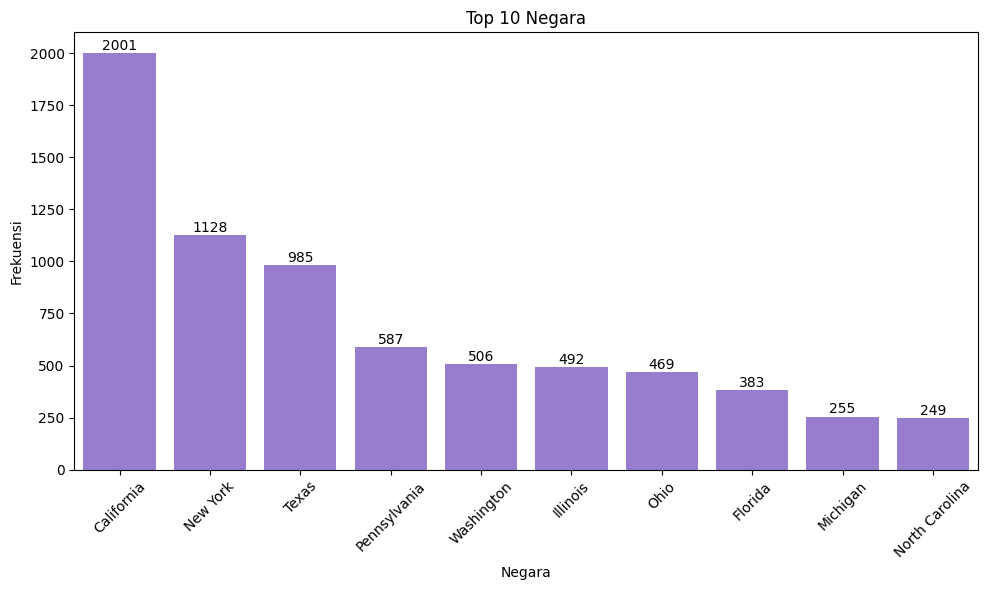

In [109]:
series_negara = pd.Series(df['Negara'])
negara_counts = series_negara.value_counts().head(10)
count_negara = pd.DataFrame({'Negara': negara_counts.index, 'Frekuensi': negara_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Negara', y='Frekuensi', data=count_negara, color='#9370DB')
for index, value in enumerate(count_negara['Frekuensi']):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.title("Top 10 Negara")
plt.xlabel("Negara")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Negara dengan jumlah transaksi terbanyak adalah California.

Distribusi Kategori Barang yang Dibeli

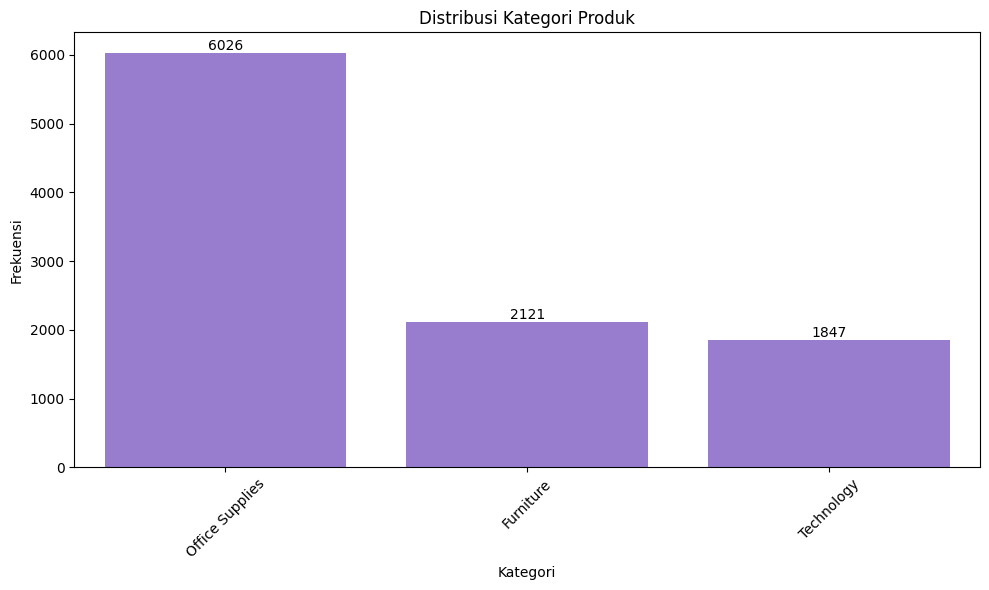

In [110]:
series_kategori = pd.Series(df['Kategori'])
kategori_counts = series_kategori.value_counts()
count_kategori = pd.DataFrame({'Kategori': kategori_counts.index, 'Frekuensi': kategori_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori', y='Frekuensi', data=count_kategori, color='#9370DB')
for index, value in enumerate(count_kategori['Frekuensi']):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.title("Distribusi Kategori Produk")
plt.xlabel("Kategori")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Kategori barang dengan jumlah transaksi terbanyak adalah Office Supplies atau perlengkapan kantor.

Distribusi SubKategori Barang yang Dibeli

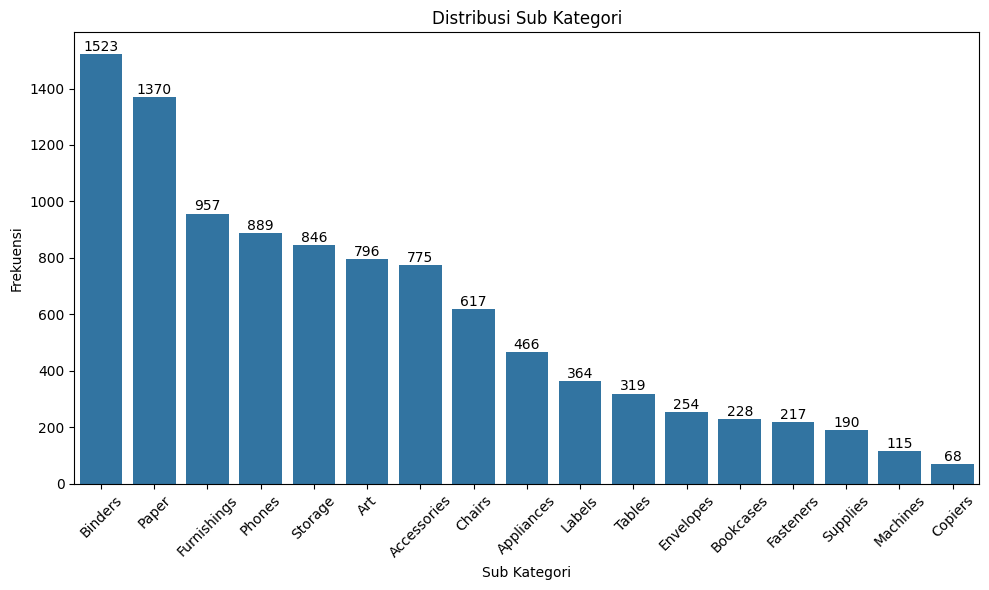

In [111]:
series_subkat = pd.Series(df['Sub_kategori'])
subkat_counts = series_subkat.value_counts()
count_subkat = pd.DataFrame({'Sub Kategori': subkat_counts.index, 'Frekuensi': subkat_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Kategori', y='Frekuensi', data=count_subkat)
for index, value in enumerate(count_subkat['Frekuensi']):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.title("Distribusi Sub Kategori")
plt.xlabel("Sub Kategori")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 SubKategori barang dengan jumlah transaksi terbanyak adalah Binders.

Distribusi Segmen Pelanggan

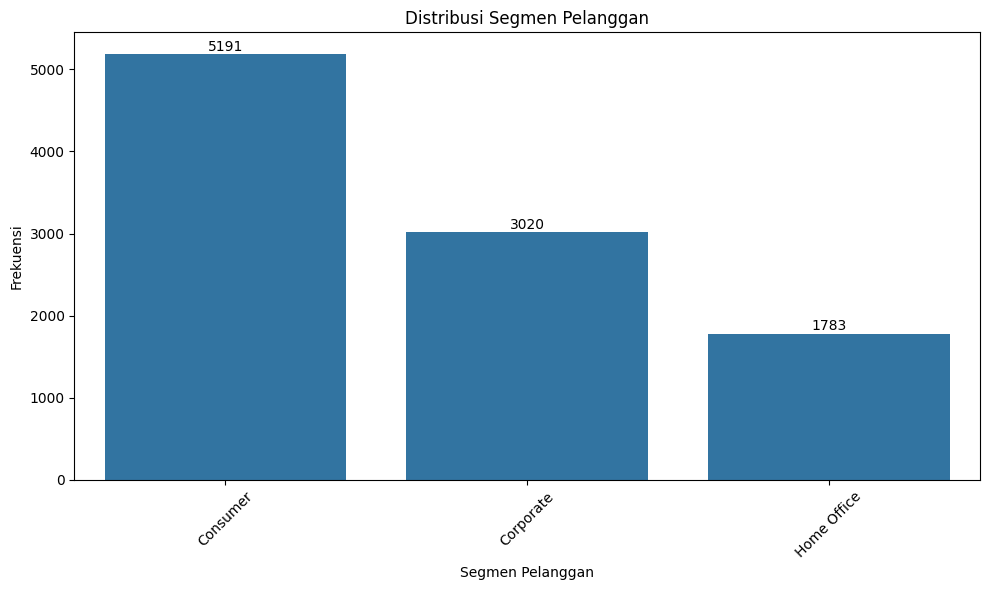

In [112]:
series_segmen = pd.Series(df['Segmen_pelanggan'])
segmen_counts = series_segmen.value_counts()
count_segmen = pd.DataFrame({'Segmen Pelanggan': segmen_counts.index, 'Frekuensi': segmen_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Segmen Pelanggan', y='Frekuensi', data=count_segmen)
for index, value in enumerate(count_segmen['Frekuensi']):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.title("Distribusi Segmen Pelanggan")
plt.xlabel("Segmen Pelanggan")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Jenis pelanggan dengan transaksi terbanyak adalah kelompok Consumer.

Distribusi Metode Pengiriman

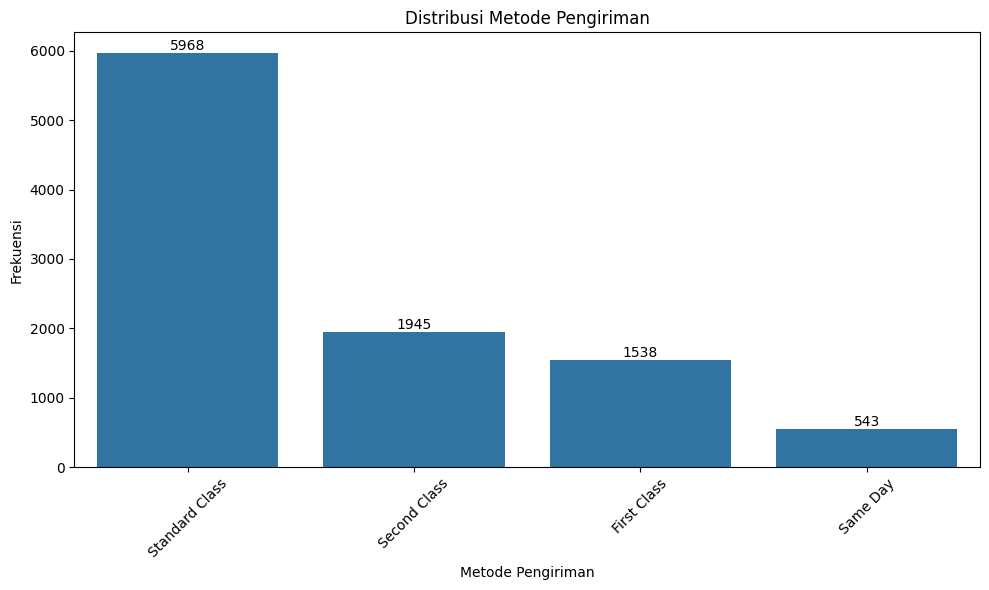

In [113]:
series_kirim = pd.Series(df['Metode_pengiriman'])
kirim_counts = series_kirim.value_counts()
count_kirim= pd.DataFrame({'Metode Pengiriman': kirim_counts.index, 'Frekuensi': kirim_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metode Pengiriman', y='Frekuensi', data=count_kirim)
for index, value in enumerate(count_kirim['Frekuensi']):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

plt.title("Distribusi Metode Pengiriman")
plt.xlabel("Metode Pengiriman")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Mayoritas metode pengiriman yang digunakan adalah Standard Class.

Distribusi Nama Produk

In [114]:
series_nama = pd.Series(df['Nama_produk'])
nama_counts = series_nama.value_counts().head(10)
count_nama = pd.DataFrame({'Nama Produk': nama_counts.index, 'Frekuensi': nama_counts.values})

print(count_nama)

                                         Nama Produk  Frekuensi
0                                    Staple envelope         48
1                                            Staples         46
2                                  Easy-staple paper         46
3                            Avery Non-Stick Binders         20
4                            Staples in misc. colors         19
5                                     Staple remover         18
6                         KI Adjustable-Height Table         18
7                            Storex Dura Pro Binders         17
8                         Staple-based wall hangings         16
9  Logitech 910-002974 M325 Wireless Mouse for We...         15


📊 Produk yang paling sering dibeli adalah Staple envelope

Analisis Distribusi Nominal pada Kolom Penjualan

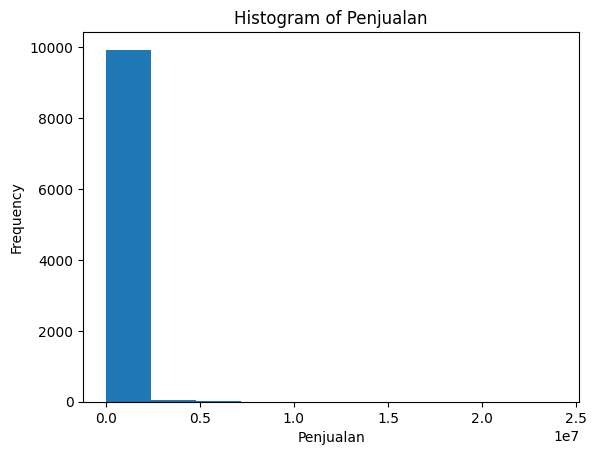

In [115]:
df['Penjualan'].plot(kind='hist')
plt.title('Histogram of Penjualan')
plt.xlabel('Penjualan')
plt.show()

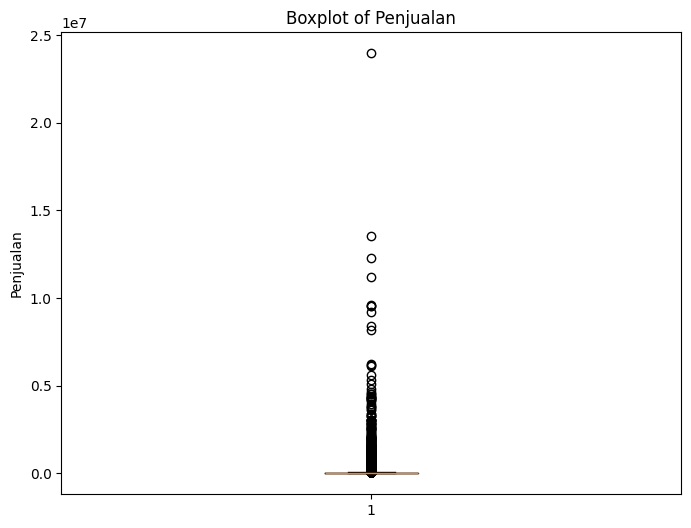

In [116]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Penjualan'])
plt.title('Boxplot of Penjualan')
plt.ylabel('Penjualan')
plt.show()

📊 Dari grafik histogram dan boxplot, variabel Penjualan tidak terdistribusi dengan baik. Harus dilakukan eksplorasi lebih lanjut pada variabel ini.

Analisis Variabel Penjualan dengan ID Produk yang Sama

In [117]:
produk = df[df['ID_produk'] == "TEC-PH-10003645"].index
df.iloc[produk]

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,Lama_pengemasan
326,327,US-2016-141544,2016-08-30,2016-01-09,First Class,PO-18850,Patrick O'Brill,Consumer,Philadelphia,Pennsylvania,...,East,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,290898.00,3,0.4,-678762.0,234
1389,1390,US-2016-108504,2016-05-02,2016-05-02,Same Day,PP-18955,Paul Prost,Home Office,Smyrna,Georgia,...,South,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,484.83,3,0.0,1260558.0,0
1998,1999,CA-2014-131905,2014-06-02,2014-09-02,First Class,ND-18460,Neil Ducich,Corporate,Chesapeake,Virginia,...,South,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,161.61,1,0.0,420186.0,92
2189,2190,CA-2017-143063,2017-10-08,2017-08-15,Standard Class,IL-15100,Ivan Liston,Consumer,Columbus,Indiana,...,Central,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,1454.49,9,0.0,3781674.0,54
5179,5180,US-2015-120502,2015-04-13,2015-04-19,Standard Class,BT-11395,Bill Tyler,Corporate,Los Angeles,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258576.00,2,0.2,193932.0,6
8104,8105,CA-2015-149846,2015-05-22,2015-05-26,Standard Class,SB-20185,Sarah Brown,Consumer,Los Angeles,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,775728.00,6,0.2,581796.0,4
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258576.00,2,0.2,193932.0,5


📊 Beberapa produk dengan ID yang sama memiliki nominal penjualan yang sangat berbeda. Jika dihitung manual (dengan menggunakan harga satuan dari produk yang tidak berdiskon), nominal penjualan benar, tapi terdapat kesalahan pada peletakan koma. Nominal ini harus diperbaiki.

Distribusi Kuantitas Pembelian

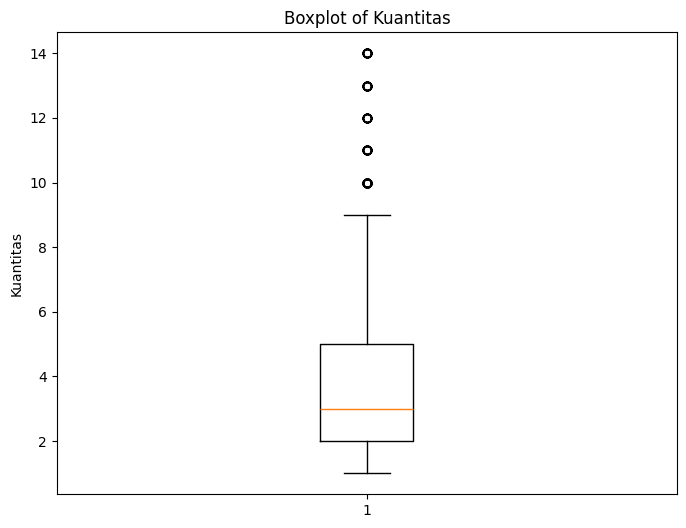

In [118]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Kuantitas'])
plt.title('Boxplot of Kuantitas')
plt.ylabel('Kuantitas')
plt.show()

📊 Tidak terdapat masalah pada distribusinya dan terlihat bahwa kuantitas pembelian berkisar antara 1 hingga 14 pcs.

Distribusi Besar Diskon

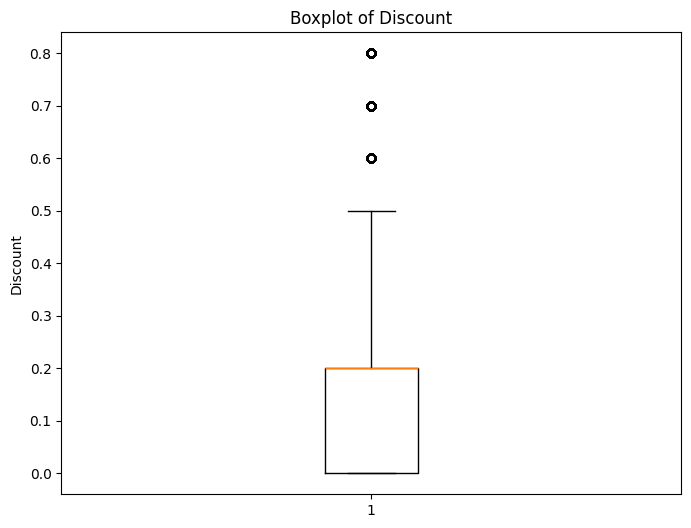

In [119]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Discount'])
plt.title('Boxplot of Discount')
plt.ylabel('Discount')
plt.show()

📊 Tidak terdapat masalah pada distribusinya dan terlihat bahwa besar diskon berkisar antara 0 hingga 80 persen.

#### DATA PRE-PROCESSING

Missing Data

In [120]:
df.isnull().sum()

,0
Index,0
ID_pesanan,0
Tanggal_pesan,0
Tanggal_kirim,0
Metode_pengiriman,0
ID_pelanggan,0
Nama_pelanggan,0
Segmen_pelanggan,0
Kota,0
Negara,0


📊 Tidak terdapat missing data

Describe Data

In [121]:
df.describe()

,Index,Tanggal_pesan,Tanggal_kirim,Kode_pos,Penjualan,Kuantitas,Discount,Untung,Lama_pengemasan
count,9994.000000,9994,9994,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03,9994.000000
mean,4997.500000,2016-04-11 07:17:44.078447104,2016-04-20 15:38:17.458475008,55190.379428,1.009426e+05,3.789574,0.156203,1.798079e+05,59.870522
min,1.000000,2014-01-02 00:00:00,2014-01-04 00:00:00,1040.000000,4.440000e-01,1.000000,0.000000,-3.839990e+07,0.000000
25%,2499.250000,2015-05-01 00:00:00,2015-05-07 00:00:00,23223.000000,3.978000e+01,2.000000,0.000000,1.899000e+01,4.000000
50%,4997.500000,2016-05-30 00:00:00,2016-06-12 00:00:00,56430.500000,3.493950e+02,3.000000,0.200000,3.628800e+04,6.000000
75%,7495.750000,2017-04-09 00:00:00,2017-04-29 00:00:00,90008.000000,2.524800e+04,5.000000,0.200000,1.509840e+05,120.000000
max,9994.000000,2017-12-30 00:00:00,2018-05-01 00:00:00,99301.000000,2.396266e+07,14.000000,0.800000,6.719981e+07,322.000000
std,2885.163629,NaN,NaN,32063.693350,5.183005e+05,2.225110,0.206452,1.722986e+06,74.868607


📊 Terdapat data negatif pada kolom Untung dan range nilai yang terlalu luas pada kolom Penjualan. Selain itu, tidak terdapat perbedaan yang signifikan antara mean dan median.

Data Duplikat

In [122]:
df.duplicated().sum()

0

📊 Tidak terdapat data duplikat

Menghapus kolom yang tidak akan digunakan

In [123]:
df = df.drop(['Index', 'Tanggal_kirim', 'Kode_pos', 'Untung'], axis=1)

Memperbaiki Format Data Tanggal

In [124]:
#df['Tanggal_pesan'] = pd.to_datetime(df['Tanggal_pesan'])
#sudah dilakukan di atas

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_pesanan         9994 non-null   object        
 1   Tanggal_pesan      9994 non-null   datetime64[ns]
 2   Metode_pengiriman  9994 non-null   object        
 3   ID_pelanggan       9994 non-null   object        
 4   Nama_pelanggan     9994 non-null   object        
 5   Segmen_pelanggan   9994 non-null   object        
 6   Kota               9994 non-null   object        
 7   Negara             9994 non-null   object        
 8   Wilayah            9994 non-null   object        
 9   ID_produk          9994 non-null   object        
 10  Kategori           9994 non-null   object        
 11  Sub_kategori       9994 non-null   object        
 12  Nama_produk        9994 non-null   object        
 13  Penjualan          9994 non-null   float64       
 14  Kuantita

#### FEATURE ENGINEERING

Penambahan Variabel Harga Satuan

In [126]:
#Hanya yang diskon = 0
df["Harga_satuan"] = df['Penjualan'] / df['Kuantitas']
df.loc[df["Discount"] != 0, "Harga_satuan"] = 0

df

,ID_pesanan,Tanggal_pesan,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan
0,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,92,130.98
1,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,92,243.98
2,CA-2016-138688,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,173,7.31
3,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00,5,0.45,23,0.00
4,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00,2,0.20,23,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248.00,3,0.20,2,0.00
9990,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,5,45.98
9991,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258576.00,2,0.20,5,0.00
9992,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,5,7.40


In [127]:
#Mengisi harga satuan lainnya dengan harga satuan yang di dapatkan dari hasil perhitungan penjualan tanpa diskon
non_zero_values = df[df['Harga_satuan'] != 0].groupby('ID_produk')['Harga_satuan'].first().to_dict()
df['Harga_satuan'] = df.apply(lambda row: non_zero_values.get(row['ID_produk'], 0) if row['Harga_satuan'] == 0 else row['Harga_satuan'], axis=1)

In [128]:
df

,ID_pesanan,Tanggal_pesan,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan
0,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,92,130.98
1,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,92,243.98
2,CA-2016-138688,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,173,7.31
3,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00,5,0.45,23,348.21
4,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00,2,0.20,23,13.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248.00,3,0.20,2,10.52
9990,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,5,45.98
9991,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258576.00,2,0.20,5,161.61
9992,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,5,7.40


Analisis Nilai Missing pada Data Harga_satuan dan Total_belanja

In [129]:
#Jumlah Baris dengan Harga_satuan = 0
count_zero_harga = (df['Harga_satuan'] == 0).sum()
print("Jumlah Baris dengan Harga_satuan = 0:", count_zero_harga)

Jumlah Baris dengan Harga_satuan = 0: 794


In [130]:
#Persentase harga satuan yang bernilai 0 dibandingkan dengan seluruh jumlah data
794/9994 * 100

7.944766860116069

📊 Terdapat missing data (Harga_satuan masih bernilai 0) pada kolom Harga_satuan sebanyak 7,9% jika dibandingkan dengan jumlah keseluruhan data.

In [131]:
#Jumlah ID_produk dengan Harga_satuan = 0
zero_harga = df[df['Harga_satuan'] == 0]
unique_transaction_ids = zero_harga['ID_produk'].nunique()
print("Jumlah ID_produk dengan Harga_satuan = 0:", unique_transaction_ids)

Jumlah ID_produk dengan Harga_satuan = 0: 225


In [132]:
#Jumlah keseluruhan produk dalam data
df['ID_produk'].nunique()

1862

In [133]:
#Persentase jumlah produk yang memiliki Harga_satuan = 0
225/1862 * 100

12.083780880773363

📊 Jumlah produk yang memiliki Harga_satuan = 0 adalah 225 dari 1862 produk atau sebesar 12%. Hal ini dikarenakan pada 1 ID produk yang sama, semua transaksi berdiskon sehingga tidak dapat ditemukan harga satuan berdasarkan transaksi tanpa diskon.

Analisis 1 Jenis Produk dengan Harga_satuan = 0

In [134]:
produk = df[df['ID_produk'] == "FUR-BO-10004218"].index
df.iloc[produk]

,ID_pesanan,Tanggal_pesan,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan
3910,CA-2015-167010,2015-05-04,Standard Class,VT-21700,Valerie Takahito,Home Office,Philadelphia,Pennsylvania,East,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,352.45,5,0.50,153,0.0
5427,US-2016-108497,2016-06-14,Same Day,MH-17290,Marc Harrigan,Home Office,Los Angeles,California,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,599165.00,5,0.15,0,0.0
5858,US-2017-153255,2017-03-09,Second Class,JK-15730,Joe Kamberova,Consumer,Concord,California,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,239666.00,2,0.15,122,0.0
6151,CA-2014-111871,2014-03-18,Second Class,EK-13795,Eileen Kiefer,Home Office,San Francisco,California,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,1198.33,10,0.15,3,0.0
6615,CA-2016-123512,2016-06-17,First Class,MV-18190,Mike Vittorini,Consumer,Los Angeles,California,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,239666.00,2,0.15,2,0.0
8866,CA-2014-120411,2014-09-20,First Class,SB-20185,Sarah Brown,Consumer,Chicago,Illinois,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,493.43,5,0.30,3,0.0
9243,CA-2014-113271,2014-09-07,Standard Class,DS-13030,Darrin Sayre,Home Office,San Francisco,California,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,119833.00,1,0.15,55,0.0
9962,CA-2015-168088,2015-03-19,First Class,CM-12655,Corinna Mitchell,Home Office,Houston,Texas,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,3834656.00,4,0.32,3,0.0


📊 Kolom penjualan original (yang memang berasal dari dataset sumber) tidak memiliki pola yang sama dalam kesalahan peletakkan koma. Beberapa data dapat dikali dengan angka tertentu karena angka terlalu kecil, sedangkan beberapa data lainnya juga dapat dibagi dengan angka tertentu karena terlalu besar, tetapi dengan tipe yang berbeda pula (beberapa harus dibagi 1000 tapi ada pula yang harus dibagi 10000 sehingga angka pembagi tidak berlaku untuk semua baris data). Karena masalah data cenderung irregular maka untuk saat ini akan tetap dilanjutkan dengan data yang ada.

📊 Data yang bernilai 0 tidak dihapus karena agar tetap terdata history transaksinya sehingga jumlah F (frequency) pada 1 pelanggan tidak berkurang dan recency tidak terpengaruh. Kelemahannya adalah pada nilai monetary (akan ada pelanggan dengan jumlah belanja yang lebih tinggi, tapi masih dikategorikan jumlah belanja rendah karena nilai belanja pada data baru [Harga_satuan dan Total_belanja] bernilai 0)

📊 Penggunaan data total belanja awal/ori (kolom Penjualan) juga tidak lebih benar karena rasio antar barisnya tidak sama. Kesalahan pada nominal bersifat irregular. Oleh karena itu, untuk kasus ini akan tetap dicoba menggunakan kolom total belanja baru yang memiliki nominal yang lebih pasti, meskipun terdapat beberapa produk dengan nominal belanja sama dengan nol atau hilang.

Menambah Variabel Total_belanja

yang merupakan hasil perkalian harga satuan dan kuantitas, kemudian dikurang diskon

In [135]:
df["Total_belanja"] = (df['Harga_satuan'] * df['Kuantitas']) * (1 - df['Discount'])
df.head()

,ID_pesanan,Tanggal_pesan,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan,Total_belanja
0,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,92,130.98,261.9600
1,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,92,243.98,731.9400
2,CA-2016-138688,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,173,7.31,14.6200
3,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00,5,0.45,23,348.21,957.5775
4,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00,2,0.20,23,13.98,22.3680


📊 Variabel total belanja yang baru sudah siap digunakan dan dapat dipastikan dengan membandingkan kolom Total_belanja (kolom baru) dan Penjualan (kolom lama).

#### PERSIAPAN & EKSPLORASI KEMBALI

In [136]:
#Melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products':len(df['ID_produk'].value_counts()),
'transactions': len(df['ID_pesanan'].value_counts()),
'customers': len(df['ID_pelanggan'].value_counts()),}],
columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(cust_x_prod)

          products  transactions  customers
quantity      1862          5009        793


📊 Data mencakup 1862 jenis produk, 5009 transaksi, dan 793 orang customer.

In [137]:
df['Tanggal_pesan'].min()

Timestamp('2014-01-02 00:00:00')

In [138]:
df['Tanggal_pesan'].max()

Timestamp('2017-12-30 00:00:00')

📊 Data mencakup rentang waktu selama 4 tahun. Data akan digunakan seluruhnya tanpa filtering 1-2 tahun terakhir karena toko pada kasus ini juga menjual furniture yang kemungkinan tidak akan dibeli secara sering.

In [139]:
# Set now = tanggal paling recent
import datetime as dt
now = dt.date(2017,12,30)

#### RFM ANALYSIS

Recency

In [140]:
df['Tanggal_pesan'] = pd.to_datetime(df['Tanggal_pesan']).dt.date
recent = df.groupby(['ID_pelanggan'], as_index=False)['Tanggal_pesan'].max()
recent.columns = ['ID_pelanggan', 'Terakhir_transaksi']
recent.head()

,ID_pelanggan,Terakhir_transaksi
0,AA-10315,2017-06-29
1,AA-10375,2017-11-12
2,AA-10480,2017-04-15
3,AA-10645,2017-05-11
4,AB-10015,2016-10-11


In [141]:
recent['Recency'] = (now - recent['Terakhir_transaksi']).apply(lambda x: x.days)
recent.head()

,ID_pelanggan,Terakhir_transaksi,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-11-12,48
2,AA-10480,2017-04-15,259
3,AA-10645,2017-05-11,233
4,AB-10015,2016-10-11,445


Frequency

In [142]:
freq = df.copy()
freq.drop_duplicates(subset=['ID_pelanggan','ID_pesanan'], keep="first", inplace=True)
freq = freq.groupby('ID_pelanggan',as_index=False)['ID_pesanan'].count()
freq.columns = ['ID_pelanggan','Frequency']
freq.head()

,ID_pelanggan,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


Monetary

In [143]:
monet = df.groupby('ID_pelanggan',as_index=False)['Total_belanja'].sum()
monet.columns = ['ID_pelanggan','Monetary']
monet.head()

,ID_pelanggan,Monetary
0,AA-10315,4848.272
1,AA-10375,956.478
2,AA-10480,1790.512
3,AA-10645,3807.770
4,AB-10015,886.156


Gabungkan Ketiganya

In [144]:
rf = recent.merge(freq,left_on='ID_pelanggan',right_on='ID_pelanggan')
rfm = rf.merge(monet,left_on='ID_pelanggan',right_on='ID_pelanggan')
rfm.set_index('ID_pelanggan',inplace=True)

rfm.drop(columns=['Terakhir_transaksi'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,5,4848.272
AA-10375,48,9,956.478
AA-10480,259,4,1790.512
AA-10645,233,6,3807.770
AB-10015,445,3,886.156


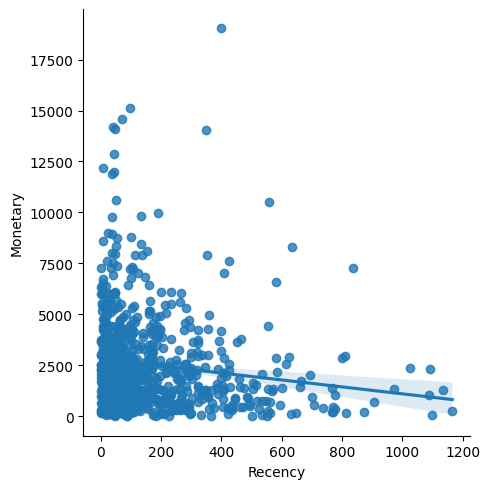

In [145]:
# Monetary vs Recency for each segment
sns.lmplot(x='Recency', y='Monetary', data=rfm,fit_reg=True)

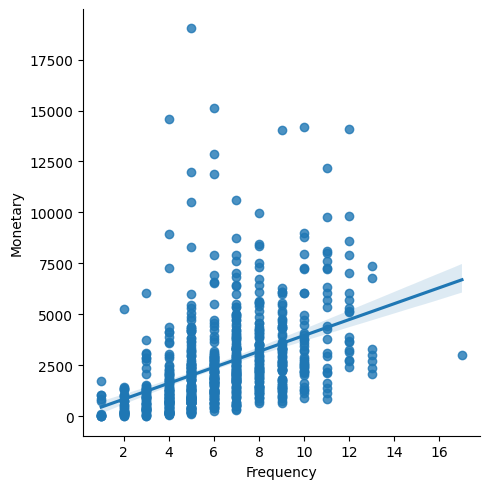

In [146]:
sns.lmplot(x='Frequency', y='Monetary', data=rfm,fit_reg=True)

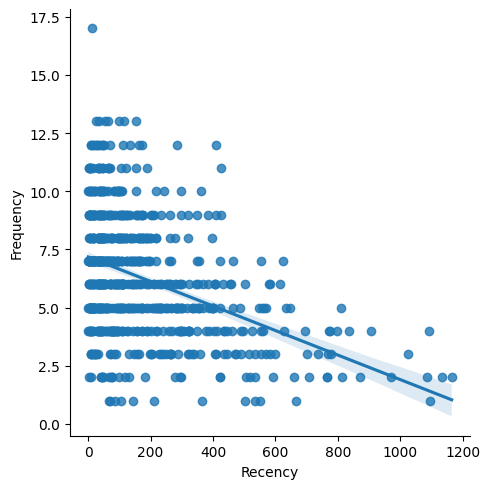

In [147]:
sns.lmplot(x='Recency', y='Frequency', data=rfm,fit_reg=True)

Text(0.5, 0, 'Monetary')

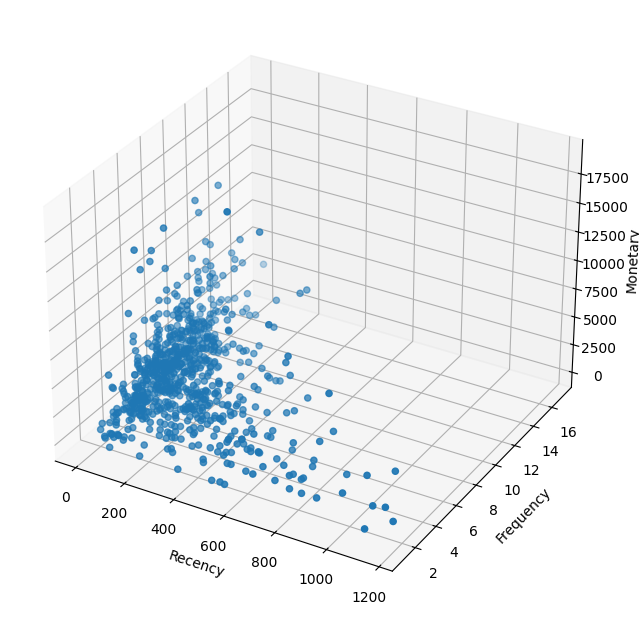

In [148]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

### SEGMENTATION

In [149]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,37.0,5.0,950.566
0.50,96.0,6.0,1988.544
0.75,218.0,8.0,3285.338


In [150]:
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

              Recency  Frequency  Monetary  R  F  M RFMgroup  Score
ID_pelanggan                                                       
AA-10315          184          5  4848.272  3  4  1      341      8
AA-10375           48          9   956.478  2  1  3      213      6
AA-10480          259          4  1790.512  4  4  3      443     11
AA-10645          233          6  3807.770  4  3  1      431      8
AB-10015          445          3   886.156  4  4  4      444     12


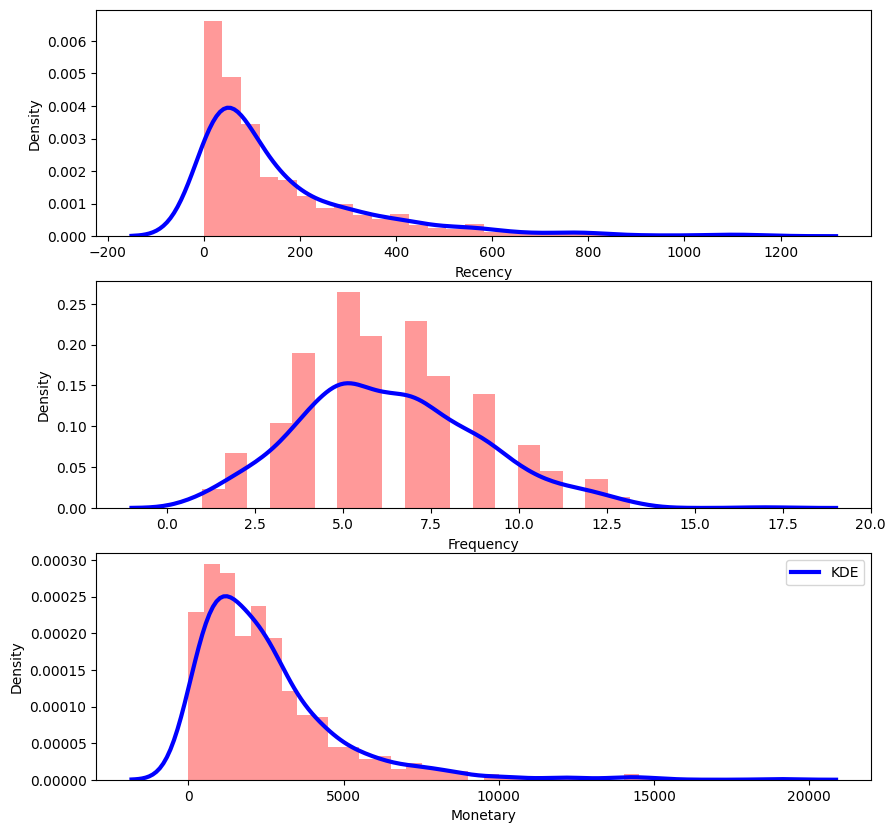

In [151]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

In [152]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,5,4848.272
AA-10375,48,9,956.478
AA-10480,259,4,1790.512
AA-10645,233,6,3807.770
AB-10015,445,3,886.156


In [153]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.157940,0.2500,0.254800
1,0.041202,0.5000,0.050267
2,0.222318,0.1875,0.094100
3,0.200000,0.3125,0.200116
4,0.381974,0.1250,0.046572
...,...,...,...
788,0.036910,0.6250,0.124800
789,0.003433,0.2500,0.286652
790,0.007725,0.4375,0.353191
791,0.046352,0.7500,0.387481


In [154]:
#Clustering dengan mengunakan Kmeans
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,5,4848.272,3,4,1,341,8,1
AA-10375,48,9,956.478,2,1,3,213,6,0
AA-10480,259,4,1790.512,4,4,3,443,11,1
AA-10645,233,6,3807.770,4,3,1,431,8,1
AB-10015,445,3,886.156,4,4,4,444,12,2
AB-10060,105,8,7306.052,3,2,1,321,6,0
AB-10105,41,10,14185.661,2,1,1,211,4,0
AB-10150,41,5,900.182,2,4,4,244,10,1
AB-10165,106,8,910.414,3,2,4,324,9,0


📊 Clustering/segmentasi dilakukan menggunakan k-means dengan langsung membagi data menjadi 3 karena tujuan pada kasus adalah untuk membagi pelanggan menjadi 3 kelompok.

In [155]:
RFMScores.groupby('Cluster').mean(numeric_only=True).sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
2,576.562500,3.781250,1539.342230,4.000000,3.802083,3.114583,10.916667
1,120.076531,4.979592,1598.252205,2.418367,3.474490,2.977041,8.869898
0,89.006557,8.832787,4032.791592,2.104918,1.524590,1.698361,5.327869


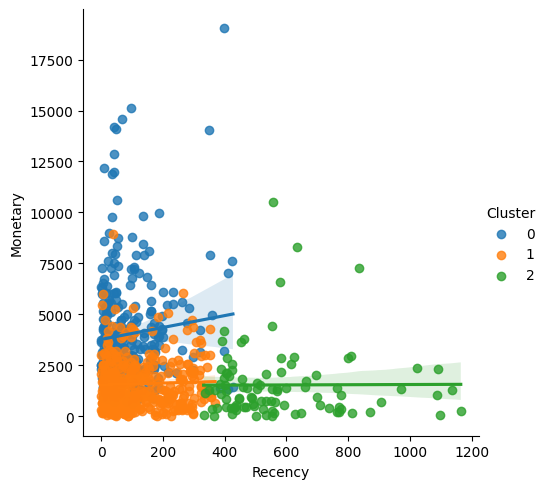

In [156]:
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

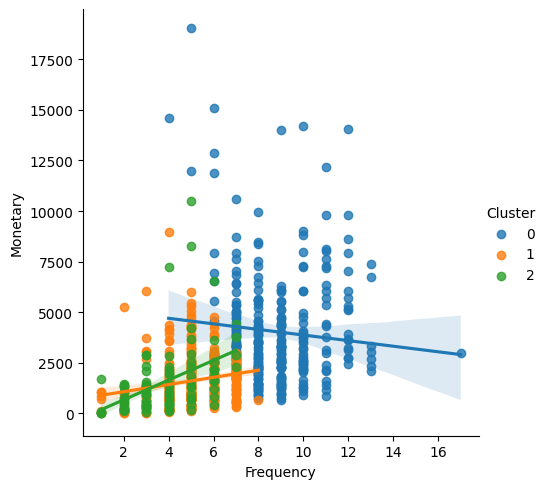

In [157]:
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

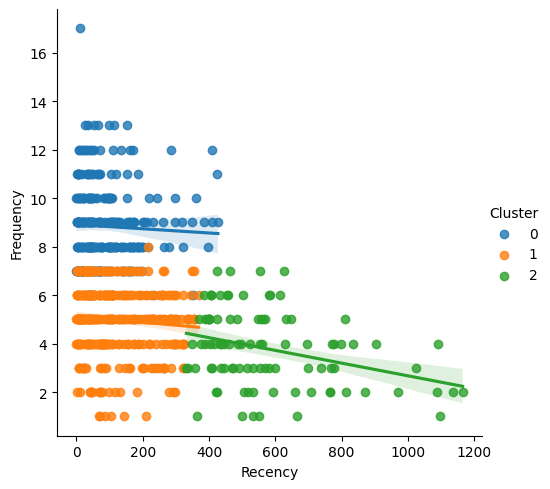

In [158]:
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

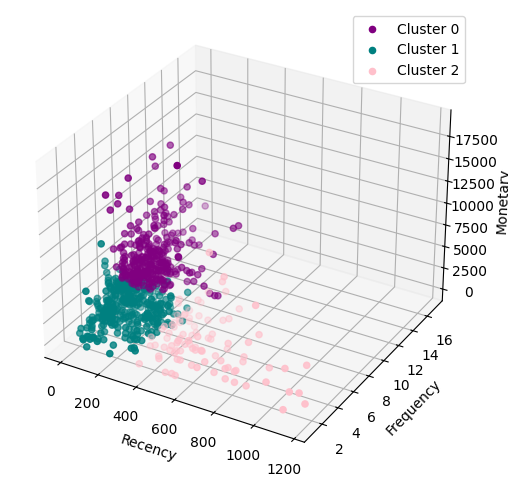

In [159]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['purple', 'teal', 'pink']

for cluster, data in RFMScores.groupby('Cluster'):
    color = custom_colors[cluster]
    ax.scatter(data['Recency'], data['Frequency'], data['Monetary'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.legend()
plt.show()

Berikut merupakan deskripsi kelompok pelanggan.
*   **Pelanggan platinum** adalah kelompok pelanggan yang sering
berbelanja dan mengeluarkan uang yang besar untuk berbelanja.
*   **Pelanggan silver** adalah kelompok pelanggan yang jarang berbelanja
dan mengeluarkan sedikit uang untuk berbelanja
*   **Pelanggan gold** adalah kelompok pelanggan di antara pelanggan
silver dan platinum.

Setelah dilakukan segmentasi, didapatkan hasil segmentasi sebagai berikut.

*   Warna **ungu** (grafik 3d)/**biru** (grafik 2d); cluster 0: **pelanggan platinum**
*   Warna **kuning/hijau**; cluster 2: **pelanggan silver**
*   Warna **toska/jingga**; cluster 1: **pelanggan gold**



### EDA

Menggabungkan Hasil Cluster ke df

In [160]:
df.set_index('ID_pelanggan', inplace=True)

In [161]:
df = pd.merge(df, RFMScores[['Cluster', 'Recency', 'Frequency']], left_index=True, right_index=True)

df

,ID_pesanan,Tanggal_pesan,Metode_pengiriman,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Wilayah,ID_produk,Kategori,...,Nama_produk,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan,Total_belanja,Cluster,Recency,Frequency
ID_pelanggan,,,,,,,,,,,,,,,,,,,,,
CG-12520,CA-2016-152156,2016-08-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,...,Bush Somerset Collection Bookcase,261.96,2,0.00,92,130.98,261.9600,2,338,3
CG-12520,CA-2016-152156,2016-08-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,92,243.98,731.9400,2,338,3
DV-13045,CA-2016-138688,2016-12-06,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,173,7.31,14.6200,1,48,5
SO-20335,US-2015-108966,2015-11-10,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,...,Bretford CR4500 Series Slim Rectangular Table,9575775.00,5,0.45,23,348.21,957.5775,1,112,6
SO-20335,US-2015-108966,2015-11-10,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,...,Eldon Fold 'N Roll Cart System,22368.00,2,0.20,23,13.98,22.3680,1,112,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TB-21400,CA-2014-110422,2014-01-21,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,...,Ultra Door Pull Handle,25248.00,3,0.20,2,10.52,25.2480,0,54,7
DB-13060,CA-2017-121258,2017-02-26,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,5,45.98,91.9600,0,16,7
DB-13060,CA-2017-121258,2017-02-26,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,...,Aastra 57i VoIP phone,258576.00,2,0.20,5,161.61,258.5760,0,16,7


Perbedaan Lama Pengemasan dan Variabel Numerik Lainnya pada Setiap Jenis Kelompok Pelanggan

In [162]:
#Describe
clustered_data0 = df[df['Cluster'] == 0]
clustered_data0.describe()

,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan,Total_belanja,Cluster,Recency,Frequency
count,5.482000e+03,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.0,5482.000000,5482.000000
mean,1.084868e+05,3.807370,0.155989,59.965341,69.900684,224.370929,0.0,89.567676,9.148304
std,5.614767e+05,2.227713,0.206755,74.969039,177.365064,650.622097,0.0,88.991199,1.820159
min,4.440000e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000
25%,3.996000e+01,2.000000,0.000000,4.000000,5.680000,13.120000,0.0,30.000000,8.000000
50%,3.736550e+02,3.000000,0.200000,7.000000,16.240000,45.000000,0.0,61.000000,9.000000
75%,2.517300e+04,5.000000,0.200000,120.000000,63.980000,191.328000,0.0,121.000000,10.000000
max,2.396266e+07,14.000000,0.800000,322.000000,3499.990000,17499.950000,0.0,427.000000,17.000000


In [163]:
clustered_data1 = df[df['Cluster'] == 1]
clustered_data1.describe()

,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan,Total_belanja,Cluster,Recency,Frequency
count,3.778000e+03,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.0,3778.000000,3778.000000
mean,8.743087e+04,3.742456,0.155408,59.814452,54.518891,165.832415,1.0,120.243780,5.325569
std,4.334600e+05,2.223566,0.205935,74.957125,108.430561,359.405813,0.0,101.566117,1.255704
min,8.360000e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
25%,3.899750e+01,2.000000,0.000000,4.000000,5.100000,12.397500,1.0,36.000000,5.000000
50%,3.155900e+02,3.000000,0.200000,6.000000,14.615000,39.980000,1.0,91.000000,5.000000
75%,2.415200e+04,5.000000,0.200000,120.000000,55.987500,155.820000,1.0,196.000000,6.000000
max,1.352398e+07,14.000000,0.800000,320.000000,1637.530000,6354.950000,1.0,369.000000,8.000000


In [164]:
clustered_data2 = df[df['Cluster'] == 2]
clustered_data2.describe()

,Penjualan,Kuantitas,Discount,Lama_pengemasan,Harga_satuan,Total_belanja,Cluster,Recency,Frequency
count,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.0,734.000000,734.000000
mean,1.141435e+05,3.899183,0.161894,59.450954,60.650504,201.330864,2.0,569.232970,4.422343
std,5.790501e+05,2.210770,0.207036,73.752839,123.461381,523.188908,0.0,182.530781,1.466810
min,8.980000e-01,1.000000,0.000000,0.000000,0.000000,0.000000,2.0,332.000000,1.000000
25%,3.847500e+01,2.000000,0.000000,4.000000,5.580000,13.120000,2.0,424.000000,3.000000
50%,3.388400e+02,3.000000,0.200000,6.000000,15.260000,44.685000,2.0,534.000000,4.000000
75%,3.335400e+04,5.000000,0.200000,120.000000,60.852500,185.754000,2.0,633.000000,6.000000
max,1.227998e+07,14.000000,0.800000,320.000000,1299.990000,9099.930000,2.0,1165.000000,7.000000


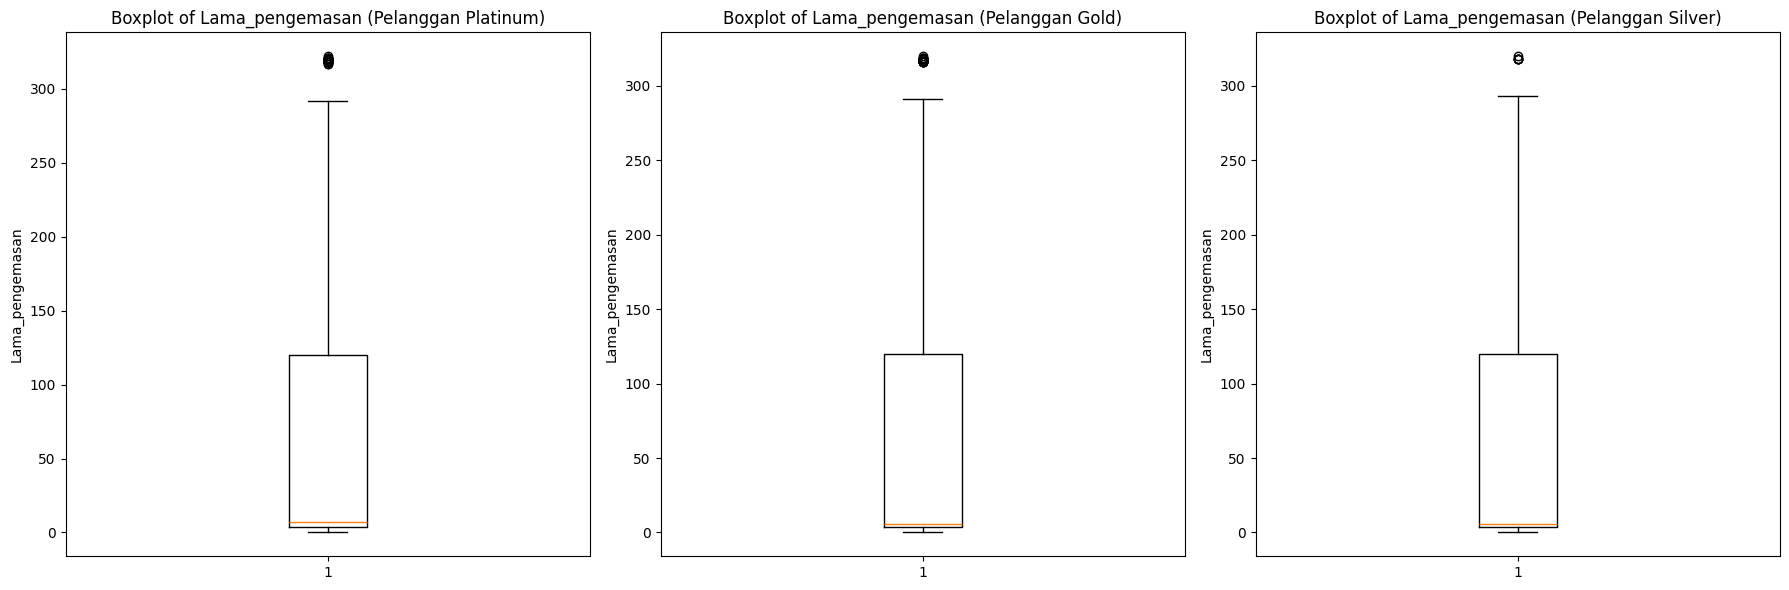

In [165]:
#Lama_pengemasan
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot boxplots for each cluster
for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Lama_pengemasan'])
    axs[i].set_title(f'Boxplot of Lama_pengemasan (Pelanggan {title})')
    axs[i].set_ylabel('Lama_pengemasan')

plt.tight_layout()
plt.show()

📊 Tidak terdapat perbedaan lama pengemasan yang signifikan dari ketiga kelompok pelanggan

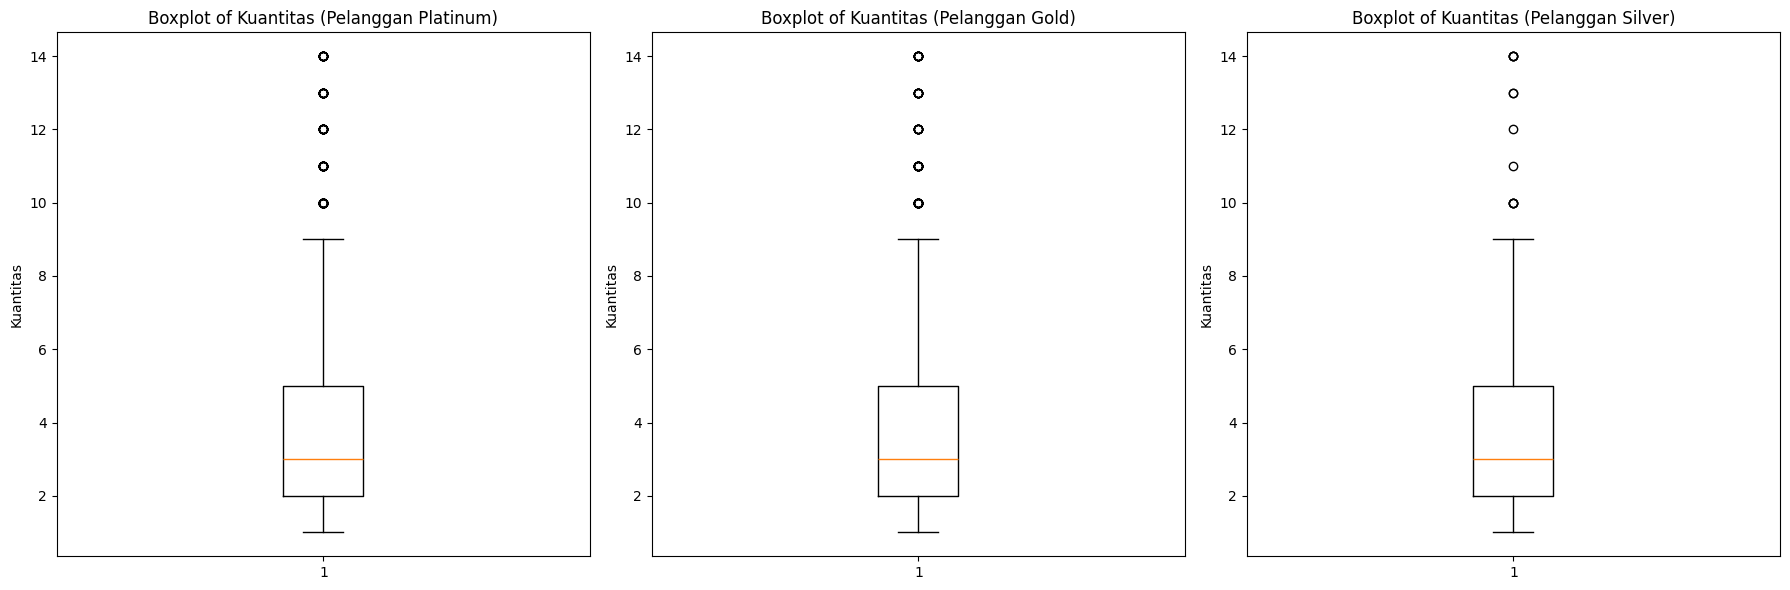

In [166]:
#Kuantitas
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot boxplots for each cluster
for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Kuantitas'])
    axs[i].set_title(f'Boxplot of Kuantitas (Pelanggan {title})')
    axs[i].set_ylabel('Kuantitas')

plt.tight_layout()
plt.show()

📊 Tidak terdapat perbedaan kuantitas atau jumlah produk yang dibeli secara signifikan dari ketiga kelompok pelanggan

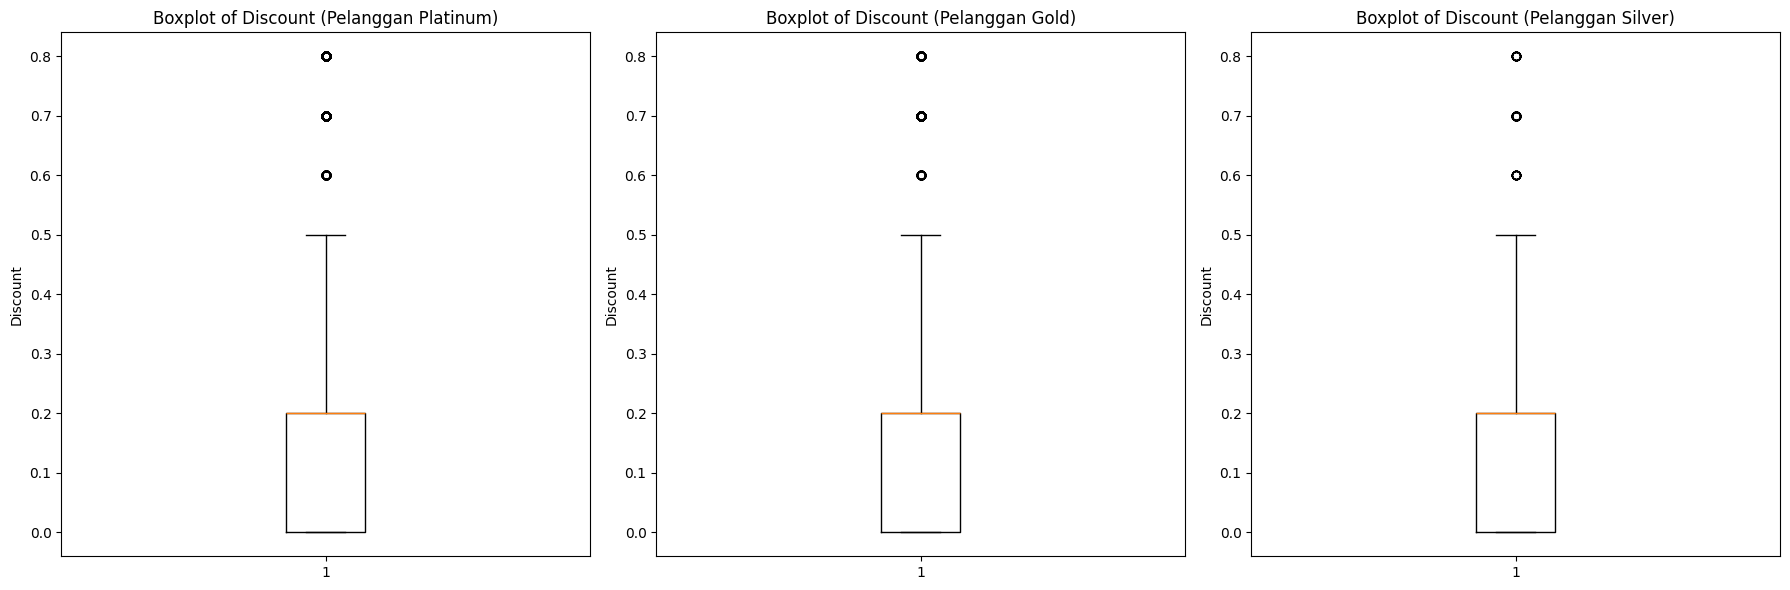

In [167]:
#Discount
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Discount'])
    axs[i].set_title(f'Boxplot of Discount (Pelanggan {title})')
    axs[i].set_ylabel('Discount')

plt.tight_layout()
plt.show()

📊 Tidak terdapat perbedaan nilai diskon yang signifikan dari ketiga kelompok pelanggan

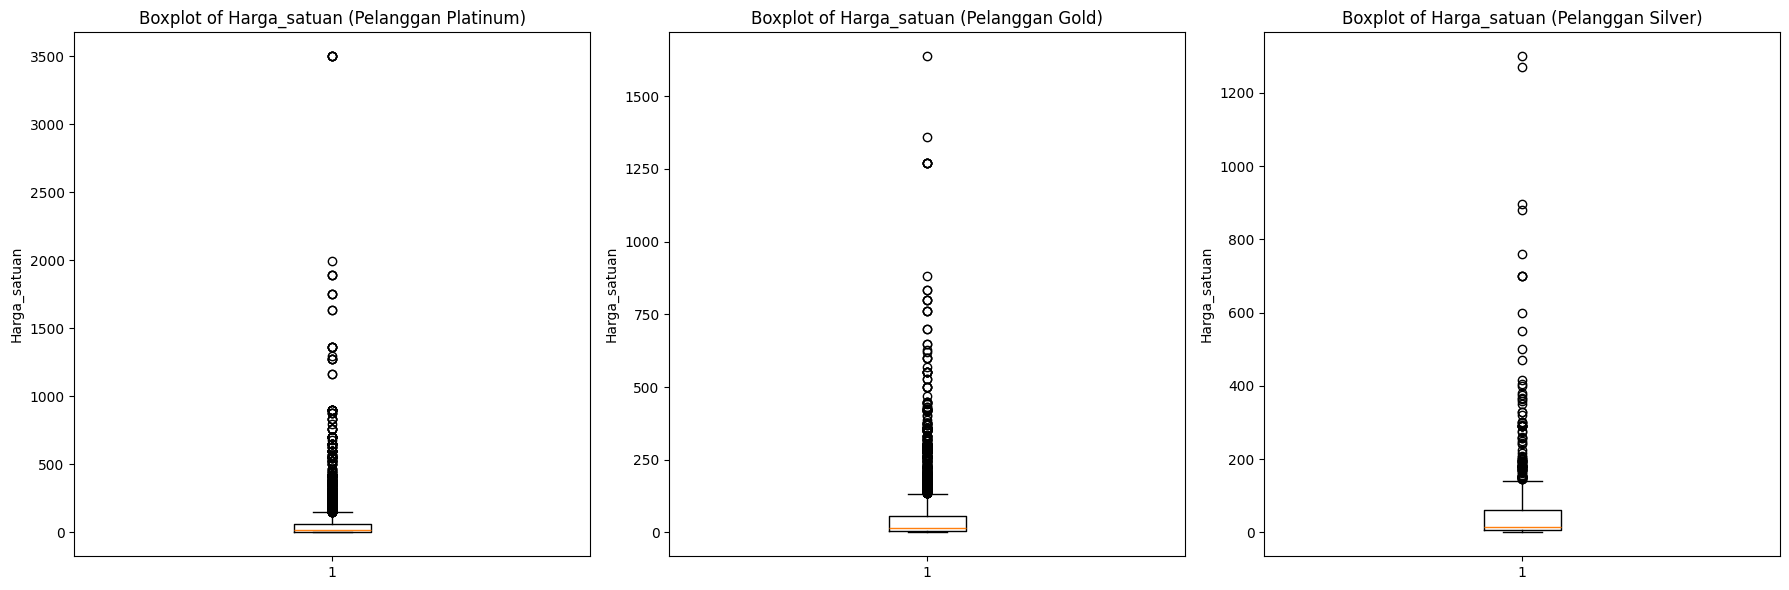

In [168]:
#Harga_satuan
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Harga_satuan'])
    axs[i].set_title(f'Boxplot of Harga_satuan (Pelanggan {title})')
    axs[i].set_ylabel('Harga_satuan')

plt.tight_layout()
plt.show()

📊 Terdapat perbedaan range yang terlihat pada boxplot untuk Harga_satuan dari ketiga kelompok pelanggan. Harga_satuan pada kelompok platinum paling tinggi, dilanjutkan dengan kelompok gold, kemudian silver.

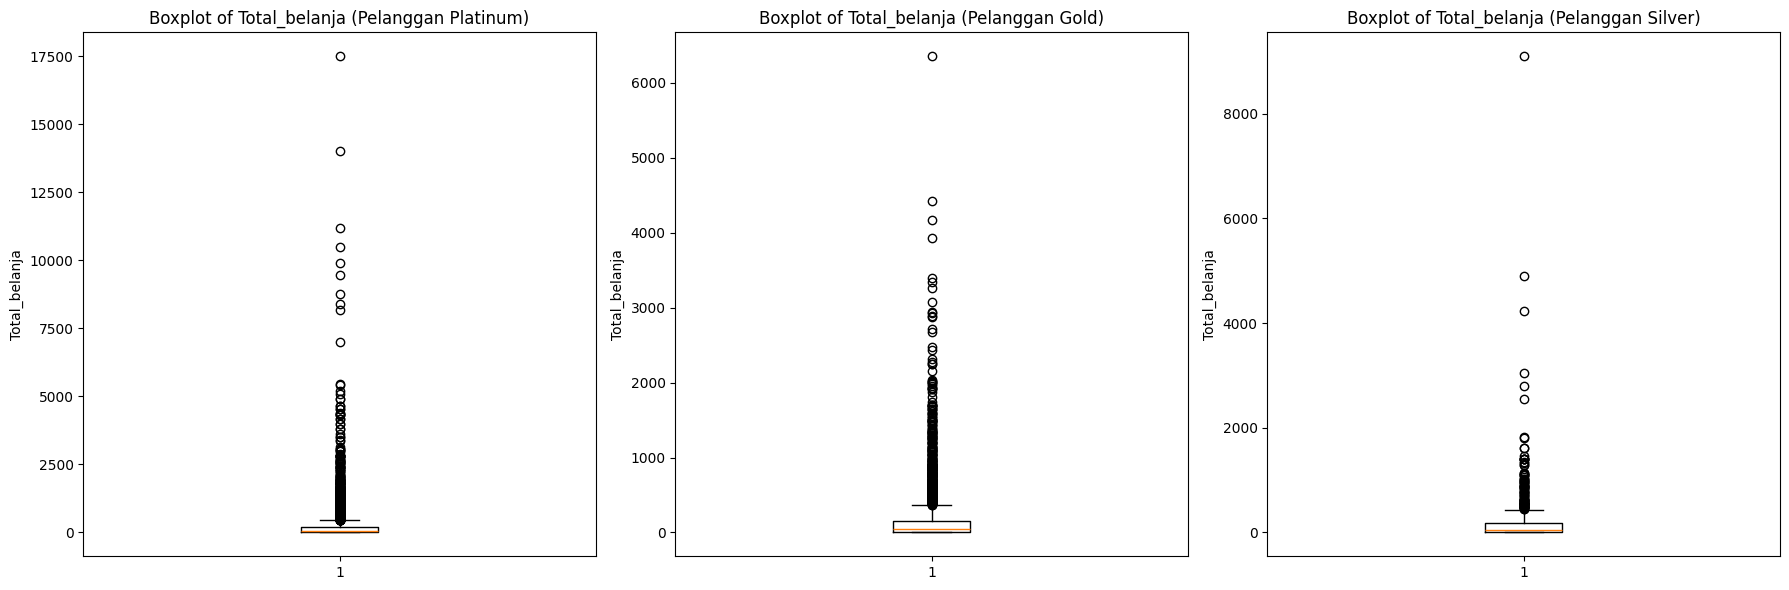

In [169]:
#Total_belanja
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Total_belanja'])
    axs[i].set_title(f'Boxplot of Total_belanja (Pelanggan {title})')
    axs[i].set_ylabel('Total_belanja')

plt.tight_layout()
plt.show()

📊 Terdapat perbedaan range yang terlihat pada boxplot untuk Total_belanja dari ketiga kelompok pelanggan. Total_belanja pada kelompok platinum paling tinggi, dilanjutkan dengan kelompok silver, terakhir gold. Namun jika dilihat dari crowd titik data outliernya, gold tetap lebih tinggi dibandingkan dengan silver. Titik data pada kelompok gold banyak terdapat pada range 500-2000, sedangkan pada kelompok silver titik data outlier mengumpul pada range di bawah 2000.

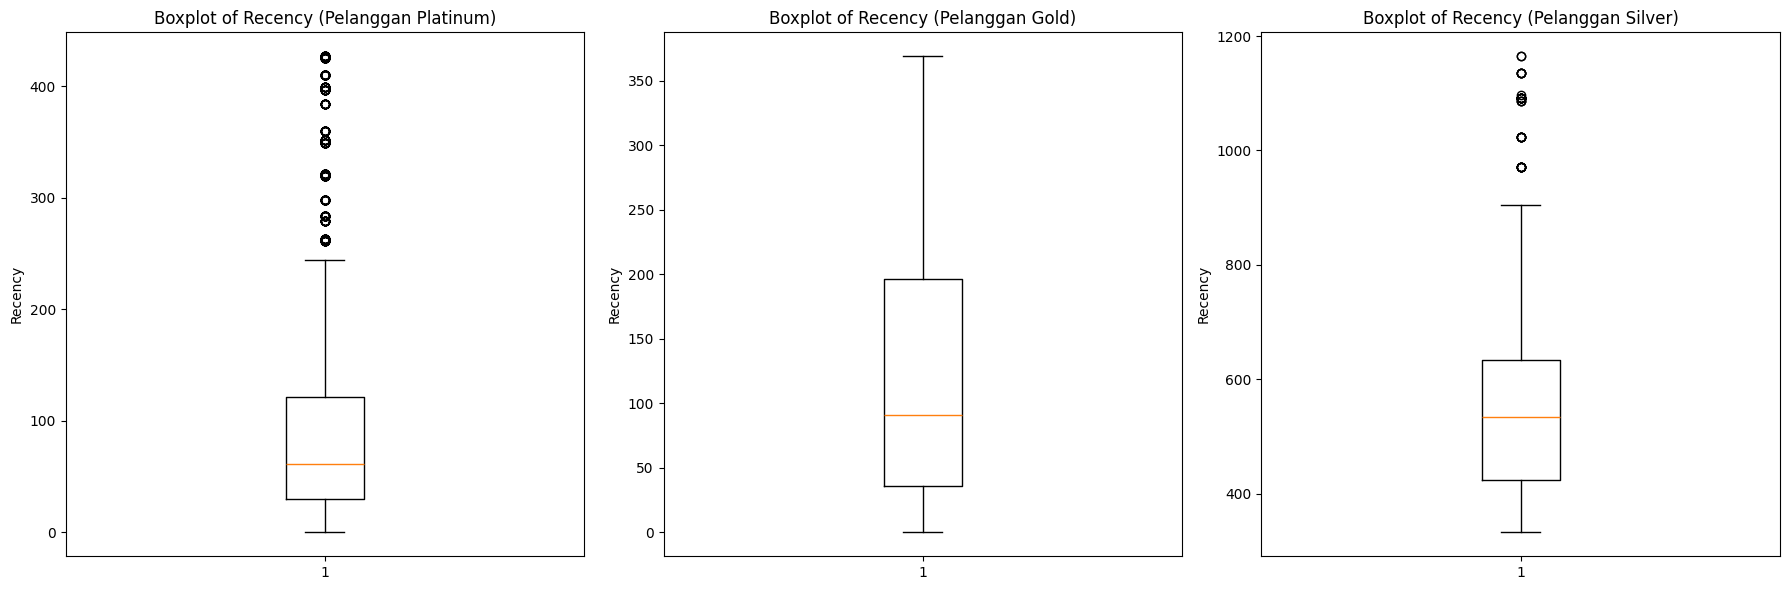

In [170]:
#Recency
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Recency'])
    axs[i].set_title(f'Boxplot of Recency (Pelanggan {title})')
    axs[i].set_ylabel('Recency')

plt.tight_layout()
plt.show()

📊 Secara visual, terdapat perbedaan yang signifikan untuk Recency pada ketiga kelompok. Sifat dari recency adalah semakin kecil semakin baik karena mewakilkan jumlah hari dari hari terakhir transaksi. Range data terluas ada pada kelompok silver, dilanjutkan platinum, kemudian gold. Namun, jika melihat mediannya urutan median terbesar masih pada kelompok silver (antara 400 hingga 600), dilanjutkan gold (antara 50 dan 100), dan gold (di tengah antara 0 dan 100, kemungkinan bernilai 50).

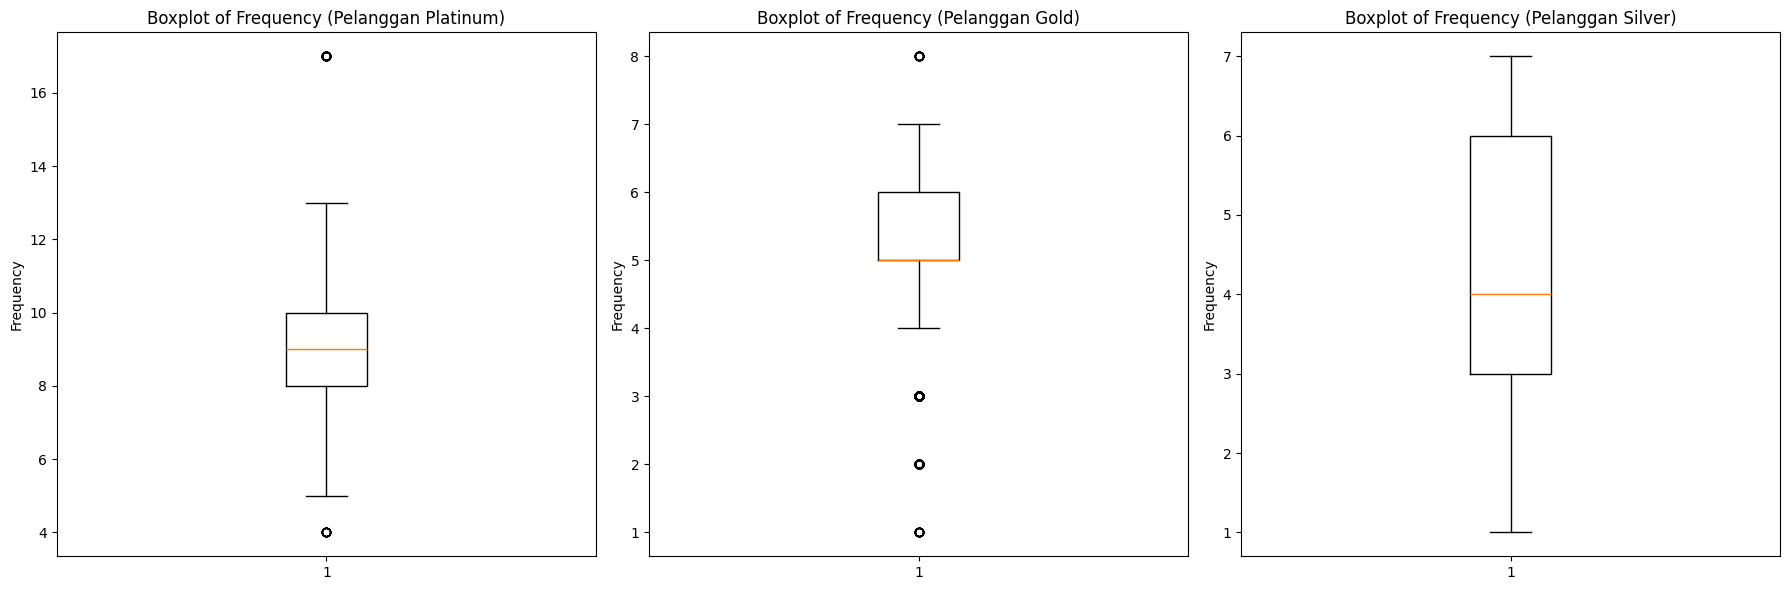

In [171]:
#Frequency
clustered_data0 = df[df['Cluster'] == 0]
clustered_data1 = df[df['Cluster'] == 1]
clustered_data2 = df[df['Cluster'] == 2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, clustered_data in enumerate([clustered_data0, clustered_data1, clustered_data2]):
    if i == 0:
        title = "Platinum"
    elif i == 1:
        title = "Gold"
    else:
        title = "Silver"
    axs[i].boxplot(clustered_data['Frequency'])
    axs[i].set_title(f'Boxplot of Frequency (Pelanggan {title})')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

📊 **Dari seluruh variabel numerik, tidak ada perbedaan yang signifikan antar ketiga kelompok pelanggan, kecuali variabel Harga_satuan, Total_belanja, Recency, dan Frequency** karena jelas variabel-variabel tersebut merupakan dasar dari pembagian segmen. Namun, terdapat perbedaan rerata yang dapat dihighlight untuk variabel Lama_pengemasan meskipun tidak berbeda jauh. Rerata lama  pengemasan untuk kelompok pelanggan silver terlihat lebih tinggi, tetapi rerata tidak dapat dijadikan acuan karena nilainya yang sangat mudah terpengaruh oleh nilai-nilai ekstrem. Jika dilihat dari kuartil-kuartil dan bentuk grafik boxplotnya, antara ketiga kelompok pelanggan tidak ditemukan perbedaan yang signifikan sehingga **tidak dapat disimpulkan bahwa lama pengemasan mempengaruhi kategori pelanggan.**

Distribusi Negara pada Setiap Jenis Kelompok Pelanggan

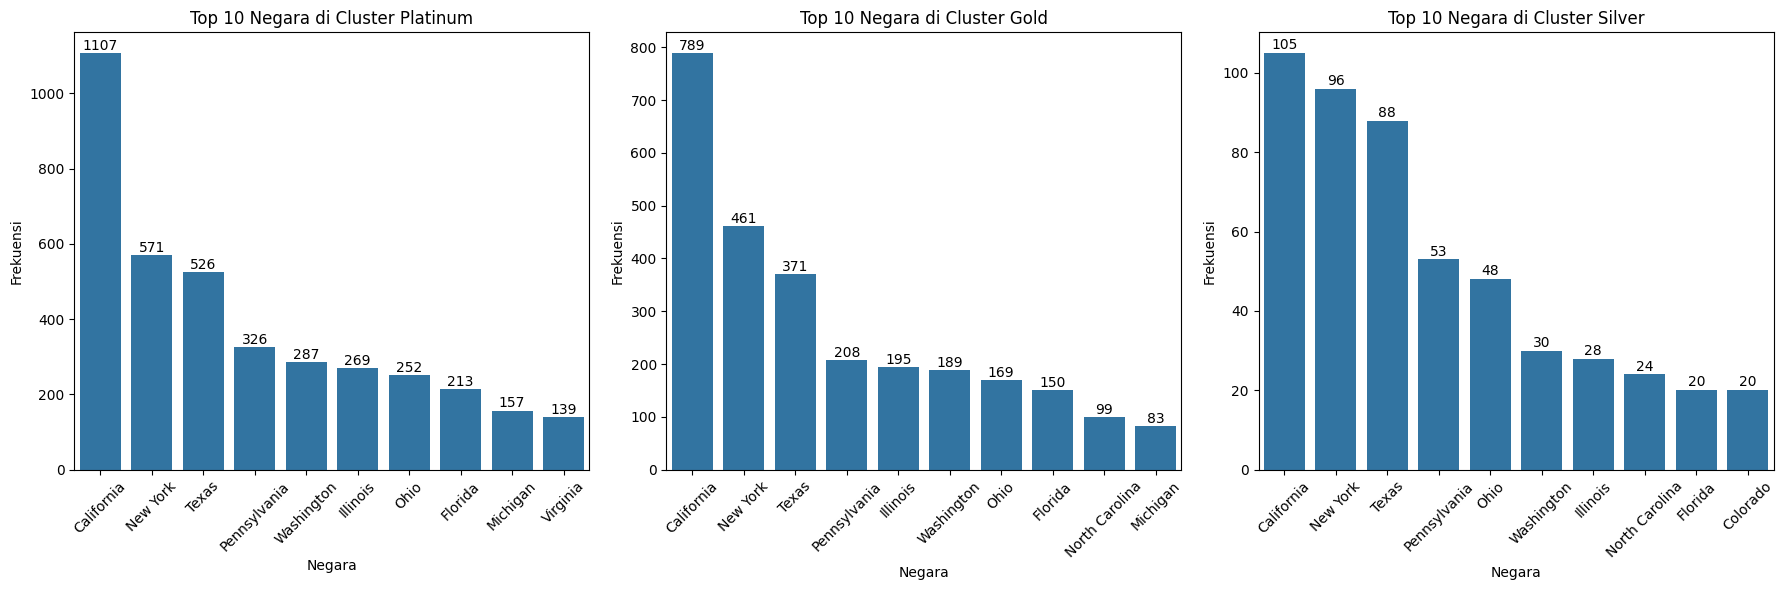

In [172]:
def plot_top_countries_per_cluster(df, cluster_column, cluster_labels, country_column, top_n=10, figsize=(18, 6)):
    fig, axes = plt.subplots(1, len(cluster_labels), figsize=figsize)
    for i, label in enumerate(cluster_labels):
        clustered_data = df[df[cluster_column] == i]
        country_counts = clustered_data[country_column].value_counts().head(top_n)
        count_country = pd.DataFrame({'Negara': country_counts.index, 'Frekuensi': country_counts.values})
        sns.barplot(x='Negara', y='Frekuensi', data=count_country, ax=axes[i])
        axes[i].set_title(f"Top {top_n} Negara di Cluster {label}")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel("Negara")
        axes[i].tick_params(axis='x', rotation=45)
        for index, value in enumerate(country_counts.values):
            axes[i].text(index, value + 0.2, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

cluster_labels = ["Platinum", "Gold", "Silver"]
plot_top_countries_per_cluster(df, 'Cluster', cluster_labels, 'Negara')

📊 Ternyata tidak ada perbedaan distribusi negara untuk setiap jenis kelompok pelanggan. Pada ketiganya sama-sama didominasi oleh pelanggan dari California.

Distribusi Kategori Produk pada Setiap Jenis Kelompok Pelanggan

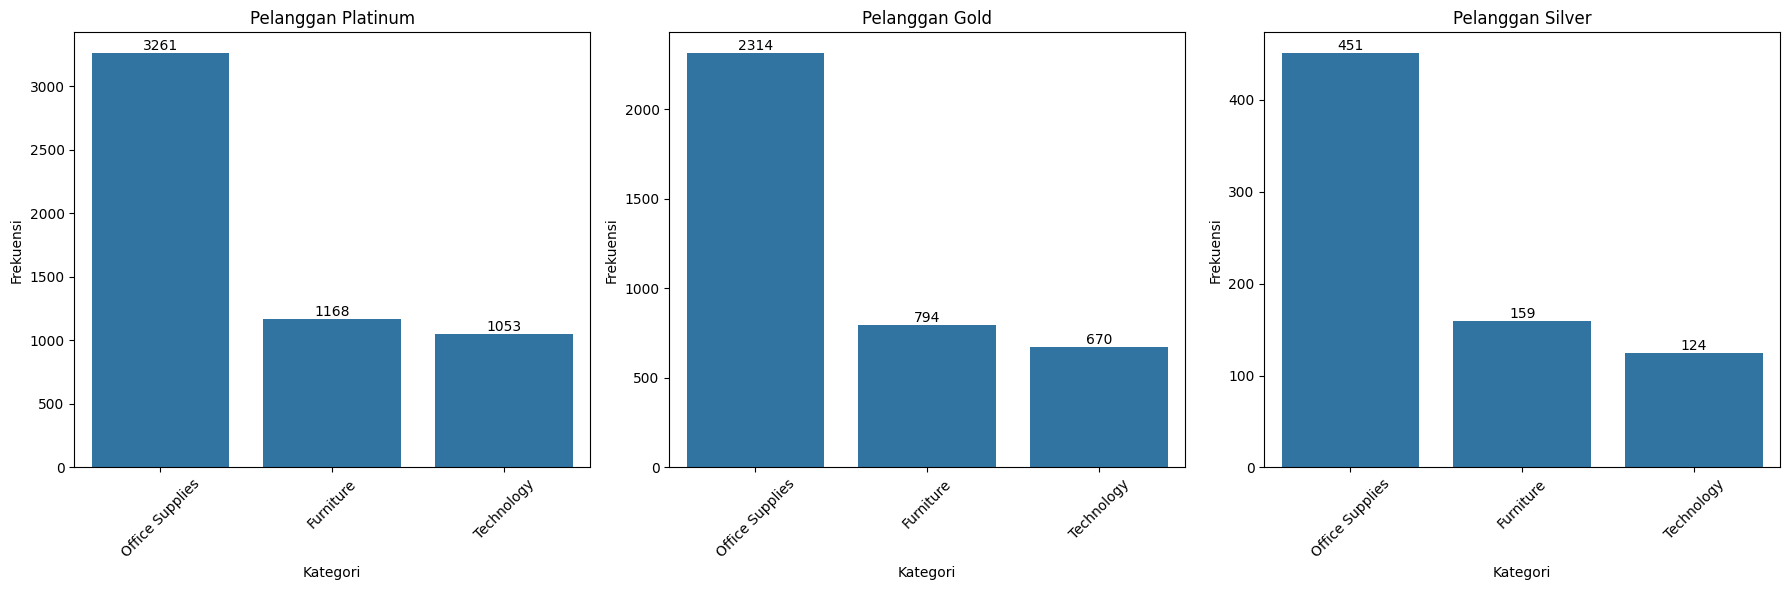

In [173]:
def plot_top_categories_per_cluster(df, cluster_column, cluster_labels, category_column, top_n=10, figsize=(18, 6)):
    fig, axes = plt.subplots(1, len(cluster_labels), figsize=figsize)
    for i, label in enumerate(cluster_labels):
        clustered_data = df[df[cluster_column] == i]
        category_counts = clustered_data[category_column].value_counts().head(top_n)
        count_category = pd.DataFrame({'Kategori': category_counts.index, 'Frekuensi': category_counts.values})
        sns.barplot(x='Kategori', y='Frekuensi', data=count_category, ax=axes[i])
        axes[i].set_title(f"Pelanggan {label}")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel("Kategori")
        axes[i].tick_params(axis='x', rotation=45)
        for index, value in enumerate(category_counts.values):
            axes[i].text(index, value + 0.2, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

cluster_labels = ["Platinum", "Gold", "Silver"]
plot_top_categories_per_cluster(df, 'Cluster', cluster_labels, 'Kategori')

📊 Tidak ada perbedaan distribusi pula untuk kategori produk yang dibeli antara ketiga kelompok pelanggan. Ketiga kelompok memiliki urutan distribusi kategori produk yang sama, yaitu Office Supplies, Furniture, dan Technology.

Distribusi Sub-Kategori Produk pada Setiap Jenis Kelompok Pelanggan

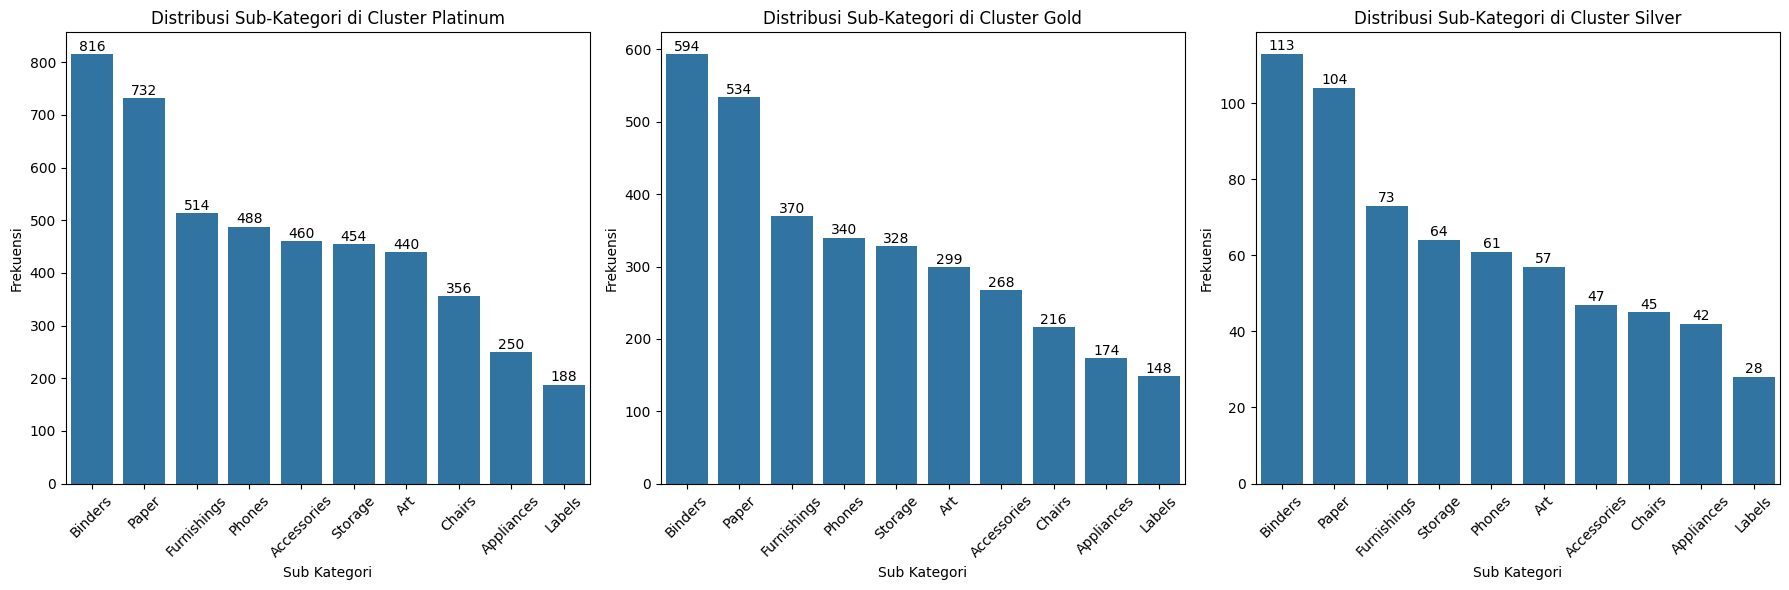

In [174]:
def plot_subkat_distribution_per_cluster(df, cluster_column, cluster_labels, subkat_column, top_n=10, figsize=(18, 6)):
    fig, axes = plt.subplots(1, len(cluster_labels), figsize=figsize)
    for i, label in enumerate(cluster_labels):
        clustered_data = df[df[cluster_column] == i]
        subkat_counts = clustered_data[subkat_column].value_counts().head(top_n)
        count_subkat = pd.DataFrame({'Sub Kategori': subkat_counts.index, 'Frekuensi': subkat_counts.values})
        sns.barplot(x='Sub Kategori', y='Frekuensi', data=count_subkat, ax=axes[i])
        axes[i].set_title(f"Distribusi Sub-Kategori di Cluster {label}")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel("Sub Kategori")
        axes[i].tick_params(axis='x', rotation=45)
        for index, value in enumerate(subkat_counts.values):
            axes[i].text(index, value + 0.2, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

cluster_labels = ["Platinum", "Gold", "Silver"]
plot_subkat_distribution_per_cluster(df, 'Cluster', cluster_labels, 'Sub_kategori')

📊 Tidak ada perbedaan distribusi untuk sub-kategori produk yang dibeli antara ketiga kelompok pelanggan pada urutan 3 pertama, yaitu Binders, Paper, Furnishings. Setelah itu urutan berbeda pada ketiga kelompoknya.

Distribusi Segmen Pelanggan pada Setiap Jenis Kelompok Pelanggan

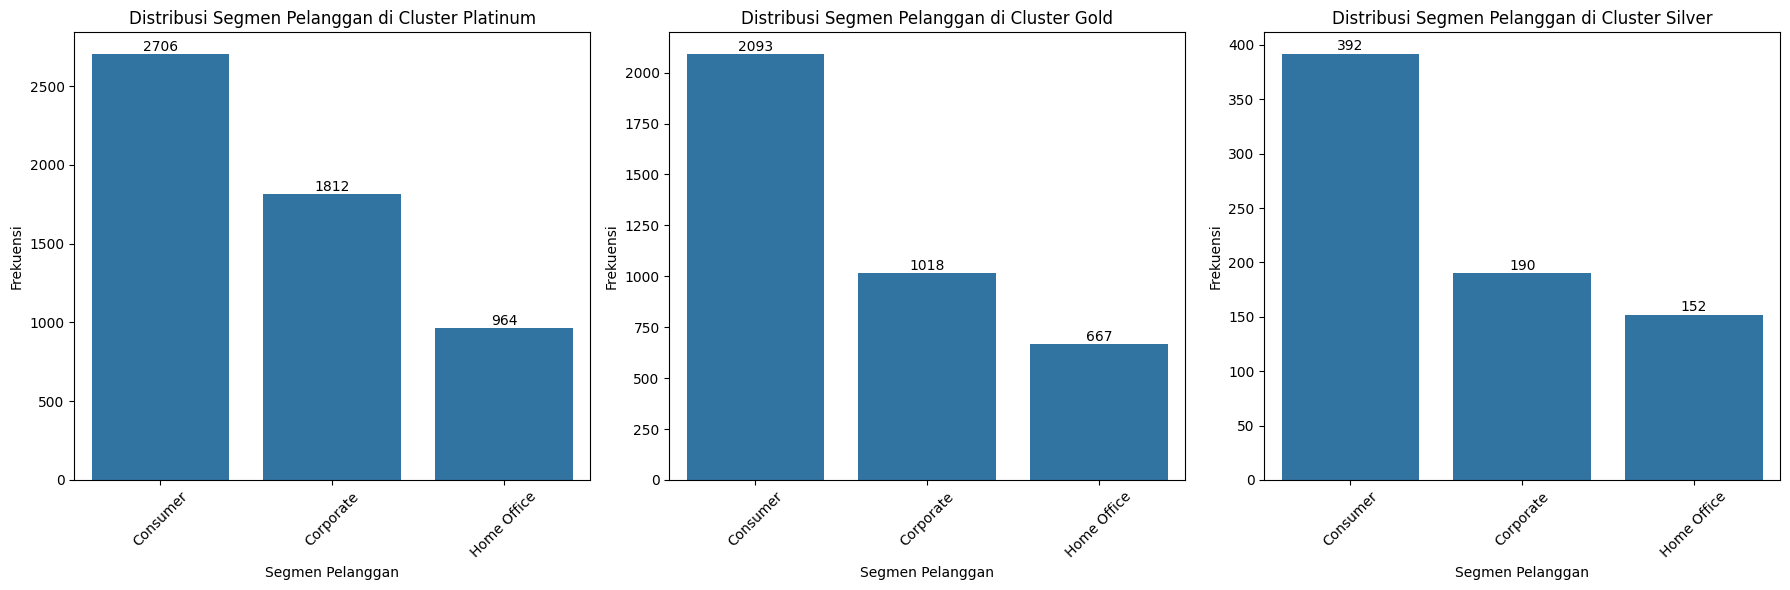

In [175]:
def plot_segmen_distribution_per_cluster(df, cluster_column, cluster_labels, segmen_column):
    fig, axes = plt.subplots(1, len(cluster_labels), figsize=(18, 6))
    for i, label in enumerate(cluster_labels):
        clustered_data = df[df[cluster_column] == i]
        segmen_counts = clustered_data[segmen_column].value_counts()
        sns.barplot(x=segmen_counts.index, y=segmen_counts.values, ax=axes[i])
        axes[i].set_title(f"Distribusi Segmen Pelanggan di Cluster {label}")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel("Segmen Pelanggan")
        axes[i].tick_params(axis='x', rotation=45)
        for index, value in enumerate(segmen_counts.values):
            axes[i].text(index, value + 0.2, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

cluster_labels = ["Platinum", "Gold", "Silver"]
plot_segmen_distribution_per_cluster(df, 'Cluster', cluster_labels, 'Segmen_pelanggan')


📊 Tidak ada perbedaan distribusi untuk segmen pelanggan pada ketiga kelompok pelanggan.

Distribusi Metode Pengiriman pada Setiap Jenis Kelompok Pelanggan

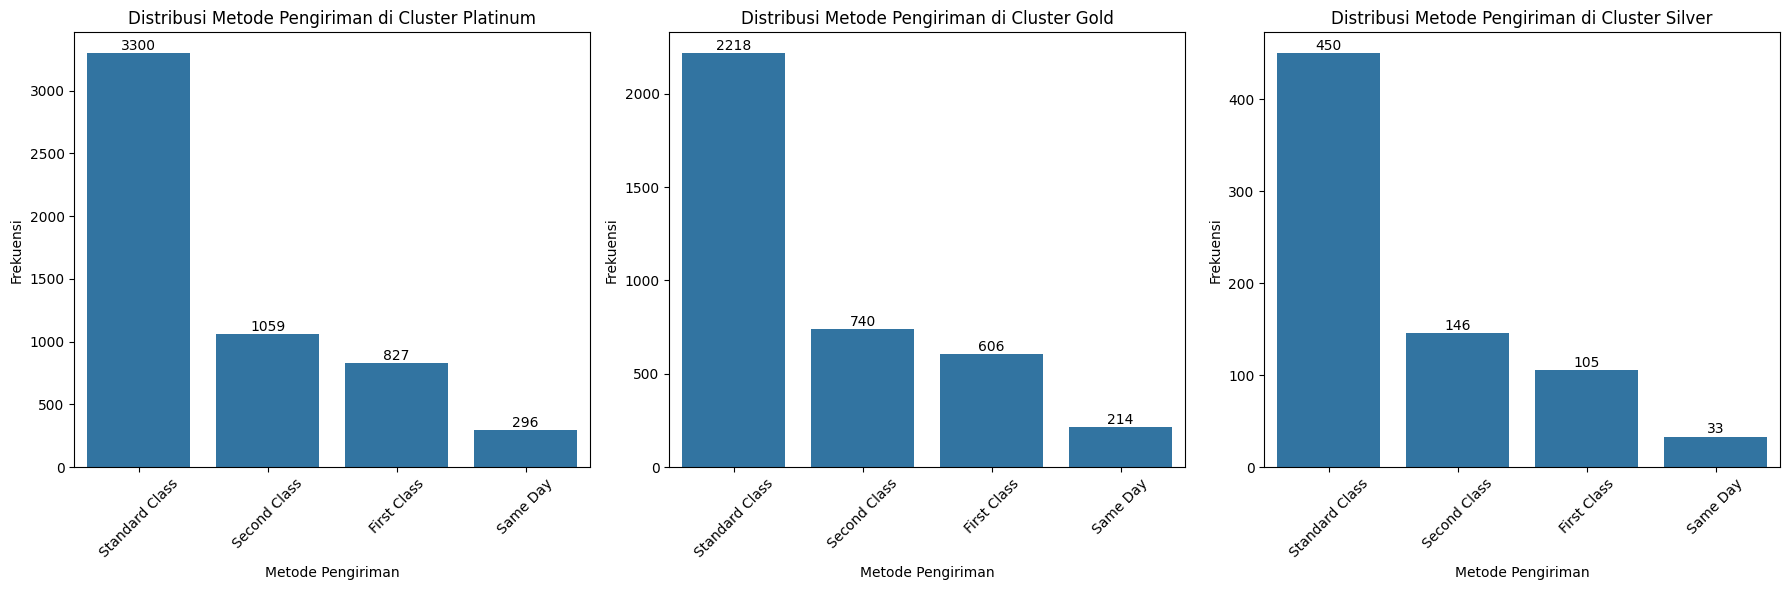

In [176]:
def plot_metode_pengiriman_per_cluster(df, cluster_column, cluster_labels, metode_pengiriman_column):
    fig, axes = plt.subplots(1, len(cluster_labels), figsize=(18, 6))
    for i, label in enumerate(cluster_labels):
        clustered_data = df[df[cluster_column] == i]
        kirim_counts = clustered_data[metode_pengiriman_column].value_counts()
        sns.barplot(x=kirim_counts.index, y=kirim_counts.values, ax=axes[i])
        axes[i].set_title(f"Distribusi Metode Pengiriman di Cluster {label}")
        axes[i].set_ylabel("Frekuensi")
        axes[i].set_xlabel("Metode Pengiriman")
        axes[i].tick_params(axis='x', rotation=45)
        for index, value in enumerate(kirim_counts.values):
            axes[i].text(index, value + 0.2, str(value), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

cluster_labels = ["Platinum", "Gold", "Silver"]
plot_metode_pengiriman_per_cluster(df, 'Cluster', cluster_labels, 'Metode_pengiriman')

📊 Tidak ada perbedaan distribusi untuk metode pengiriman pada ketiga kelompok pelanggan

### KESIMPULAN/SARAN

📊 Tidak terdapat perbedaan yang signifikan antara ketiga kelompok pada semua variabel, kecuali, variabel Harga_satuan, Total_belanja, Recency, dan Frequency karena variabel-variabel tersebut merupakan dasar dari pembagian segmen.

📊 Berarti, variabel-variabel yang ada (selain Harga_satuan, Total_belanja, Recency, dan Frequency) tidak terlalu mempengaruhi seorang pelanggan untuk terkategori menjadi kelompok pelanggan tertentu.

📊 Pengalokasian promo dapat dilakukan dengan:
*   **Kelompok silver -> promo besar**
*   **Kelompok gold -> promo sedang**
*   **Kelompok platinum -> promo kecil**

Kelompok silver perlu lebih "dipancing" agar dapat meningkatkan total pembelian dan frekuensi pembelian sehingga dapat diberikan promo yang lebih besar untuk menarik pelanggan kelompok ini. Sedangkan pada kelompok platinum, meskipun tidak diberikan promo, tren penjualan kepada kelompok ini sudah dapat memberikan keuntungan yang cukup baik dengan total pembelian dan frekuensi pembelian yang cenderung lebih tinggi sehingga pemberian promo besar pada kelompok ini tidak terlalu urgent atau bukan suatu prioritas untuk dilakukan. Kelompok gold juga masih perlu diberikan promo untuk menarik total pembelian dengan jumlah yang lebih tinggi dan lebih sering lagi.
